<a href="https://colab.research.google.com/github/Johnson-Lauren/Austin-Airbnb-Regression/blob/main/Final_Project_Investing_in_Austin_LJohnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Investing in Austin

### Load in libraries

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

# Data Manipulation and Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
import statsmodels.api as sm

# Linear Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# K-means Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

### Load in CSV file, Eyeball Data

In [ ]:
# read in austin airbnb csv file
austin_bnb = pd.read_excel('/content/airbnb_listings_austin cleaned.xlsx')
austin_bnb

id                           listing_url  \
0       72635    https://www.airbnb.com/rooms/72635   
1     5386323  https://www.airbnb.com/rooms/5386323   
2     8826517  https://www.airbnb.com/rooms/8826517   
3     8828616  https://www.airbnb.com/rooms/8828616   
4     8536913  https://www.airbnb.com/rooms/8536913   
...       ...                                   ...   
5830  6063670  https://www.airbnb.com/rooms/6063670   
5831  8422925  https://www.airbnb.com/rooms/8422925   
5832  3345881  https://www.airbnb.com/rooms/3345881   
5833  8954997  https://www.airbnb.com/rooms/8954997   
5834  7618185  https://www.airbnb.com/rooms/7618185   

                                    name  \
0          3 Private Bedrooms, SW Austin   
1                        Cricket Trailer   
2         Private room 1 in South Austin   
3         Private room 2 in South Austin   
4              Brand-New 3BR Austin Home   
...                                  ...   
5830      Austin's Downtown Garden Suite   
5831        Two beds in Downtown Austin!   
5832  Casa RomÃ¡ntica en Picos de Europa   
5833                Living room with bed   
5834     Comfy 1 bedroom in North Austin   

                                                summary  \
0     Conveniently located 10-15 from downtown in SW...   
1     Rent this cool concept trailer that has everyt...   
2     Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3     Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4     Brand-new 3BR/2BA Austin home with landscaped ...   
...                                                 ...   
5830  Enjoy being literally steps from everything th...   
5831  Prime location for the Austin Convention Cente...   
5832  Axtur: Picos de Europa. Desfiladero del Sella ...   
5833                Living room with bed have bathroom.   
5834                                                NaN   

                                                  space  \
0     We have three spare bedrooms, each with a quee...   
1     Rental arrangements for this trailer allows yo...   
2                                                   NaN   
3                                                   NaN   
4     Feel instantly at home at our brand new 3BR/2B...   
...                                                 ...   
5830  If you are looking for the perfect suite in th...   
5831  Located in the heart of downtown, this room co...   
5832  Una casa excepcional en un paisaje excepcional...   
5833                                                NaN   
5834  Cozy one bedroom/one bath 1st floor apartment ...   

                                            description experiences_offered  \
0     Conveniently located 10-15 from downtown in SW...                none   
1     Rent this cool concept trailer that has everyt...                none   
2     Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3     Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4     Brand-new 3BR/2BA Austin home with landscaped ...                none   
...                                                 ...                 ...   
5830  Enjoy being literally steps from everything th...                none   
5831  Prime location for the Austin Convention Cente...                none   
5832  Una casa excepcional en un paisaje excepcional...                none   
5833                Living room with bed have bathroom.                none   
5834  Cozy one bedroom/one bath 1st floor apartment ...                none   

                                  neighborhood_overview  \
0     Location and convenience are key.  Easy access...   
1     We're talking about wherever you'd like in the...   
2                                                   NaN   
3                                                   NaN   
4     Entertainment and activities are plentiful her...   
...                                                 ...   
5830  I love that the downtown neighborho

### Identify Rows & Columns, Determine Unnecessary Columns

In [ ]:
# Identifying Missing Values for Austin Airbnb Dataframe
austin_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           5835 non-null   int64         
 1   listing_url                  5835 non-null   object        
 2   name                         5835 non-null   object        
 3   summary                      5368 non-null   object        
 4   space                        4470 non-null   object        
 5   description                  5829 non-null   object        
 6   experiences_offered          5835 non-null   object        
 7   neighborhood_overview        3571 non-null   object        
 8   notes                        2406 non-null   object        
 9   transit                      3488 non-null   object        
 10  host_id                      5835 non-null   int64         
 11  host_name                    5820 non-null 

#### There are missing values shown variously throughout the dataframe. After taking a quick look, I have chosen to drop the following columns: listing_url, summary, space, experiences_offered, notes, host_id, host_about. Neighborhood_overview and transit were missing more than 20% of the data, therefore they were dropped.

In [ ]:
# drop unnecessary columns
austin_bnb = austin_bnb.drop(['id', 'name','listing_url', 'neighborhood_overview', 'transit', 'summary', 'space', 'description', 'experiences_offered', 'notes', 'host_id', 'host_name', 'host_about', 'host_location','host_response_rate', 'host_has_profile_pic', 'has_availability', 'amenities', 'square_feet', 'weekly_price', 'security_deposit', 'availability_365' ], axis=1)
austin_bnb

host_since  host_response_time host_is_superhost  host_listings_count  \
0    2011-02-04                 NaN                 f                  1.0   
1    2015-02-17                 NaN                 f                  1.0   
2    2015-10-10                 NaN                 f                  2.0   
3    2015-10-10                 NaN                 f                  2.0   
4    2015-04-13  within a few hours                 f                301.0   
...         ...                 ...               ...                  ...   
5830 2013-02-01  within a few hours                 t                 21.0   
5831 2015-09-15      within an hour                 f                  4.0   
5832 2014-04-29      within an hour                 f                  5.0   
5833 2015-08-29  a few days or more                 f                  2.0   
5834 2014-08-26                 NaN                 f                  1.0   

     host_identity_verified neighbourhood             city property_type  \
0                         f      Circle C           Austin         House   
1                         t      Circle C           Austin     Camper/RV   
2                         t           NaN           Austin         House   
3                         t           NaN           Austin         House   
4                         t           NaN           Austin         House   
...                     ...           ...              ...           ...   
5830                      t      Downtown           Austin     Apartment   
5831                      t      Downtown           Austin   Condominium   
5832                      f           NaN  Cangas de OnÃ­s         House   
5833                      t           NaN       Round Rock     Apartment   
5834                      t           NaN     Pflugerville     Apartment   

            room_type  accommodates  ...  number_of_reviews  \
0        Private room             6  ...                  1   
1        Private room             2  ...                  0   
2        Private room             2  ...                  0   
3        Private room             2  ...                  0   
4     Entire home/apt             6  ...                  0   
...               ...           ...  ...                ...   
5830  Entire home/apt             4  ...                  9   
5831     Private room             2  ...                  0   
5832  Entire home/apt             2  ...                  1   
5833      Shared room             1  ...                  0   
5834  Entire home/apt             2  ...                  0   

      review_scores_rating  review_scores_accuracy review_scores_cleanliness  \
0                    100.0                    10.0                      10.0   
1                      NaN                     NaN                       NaN   
2                      NaN                     NaN                       NaN   
3                      NaN                     NaN                       NaN   
4                      NaN                     NaN                       NaN   
...                    ...                     ...                       ...   
5830                 100.0                    10.0                      10.0   
5831                   NaN                     NaN                       NaN   
5832                 100.0                     8.0                      10.0   
5833                   NaN                     NaN                       NaN   
5834                   NaN                     NaN                       NaN   

      review_scores_checkin  review_scores_communication  \
0                      10.0                         10.0   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   
...                     ...                          ...   
5830             

### Impute Missing Values

In [ ]:
# Identifying Missing Values
austin_bnb.isnull().sum()

host_since                       15
host_response_time             1658
host_is_superhost                15
host_listings_count              15
host_identity_verified           15
neighbourhood                  1035
city                              0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        46
bedrooms                          6
beds                             23
bed_type                          0
price                             0
cleaning_fee                   2248
guests_included                   0
extra_people                      0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
number_of_reviews                 0
review_scores_rating           2046
review_scores_accuracy         2059
review_scores_cleanliness      2057
review_scores_checkin          2057
review_scores_communication 

In [ ]:
austin_bnb.dtypes

host_since                     datetime64[ns]
host_response_time                     object
host_is_superhost                      object
host_listings_count                   float64
host_identity_verified                 object
neighbourhood                          object
city                                   object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
bed_type                               object
price                                   int64
cleaning_fee                          float64
guests_included                         int64
extra_people                            int64
minimum_nights                          int64
availability_30                         int64
availability_60                         int64
availability_90                   

In [ ]:
# Change host_since data type from datetime to object
austin_bnb['host_since'] = austin_bnb['host_since'].dt.strftime('%Y')

#### To combat the missing values in the dataset, I will be using interpolate with the median for numeric data and fillna "unknown" for categorical data.

In [ ]:
#Impute variable 3PP with its median for numeric data
nan_fill =  ['host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value' ]
for x in nan_fill:
  austin_bnb[x].fillna(austin_bnb[x].mean(), inplace=True)

In [ ]:
# Fill Cleaning_fee with 0 because NAN represents there is no cleaning fee
austin_bnb['cleaning_fee'].fillna(0, inplace=True)

In [ ]:
# Fill all categorical data with "not provided"
cat_fill = ['host_since', 'host_response_time', 'host_is_superhost','host_identity_verified','neighbourhood']
for x in cat_fill:
  austin_bnb[x].fillna('not provided', inplace=True)

In [ ]:
# Double check all missing values have been filled
austin_bnb.isnull().sum()

host_since                     0
host_response_time             0
host_is_superhost              0
host_listings_count            0
host_identity_verified         0
neighbourhood                  0
city                           0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bo

### Exploratory Analysis

In [ ]:
# Put all categorical columns into a list
categorical_col = austin_bnb.select_dtypes(include=[object]).columns
categorical_col

Index(['host_since', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

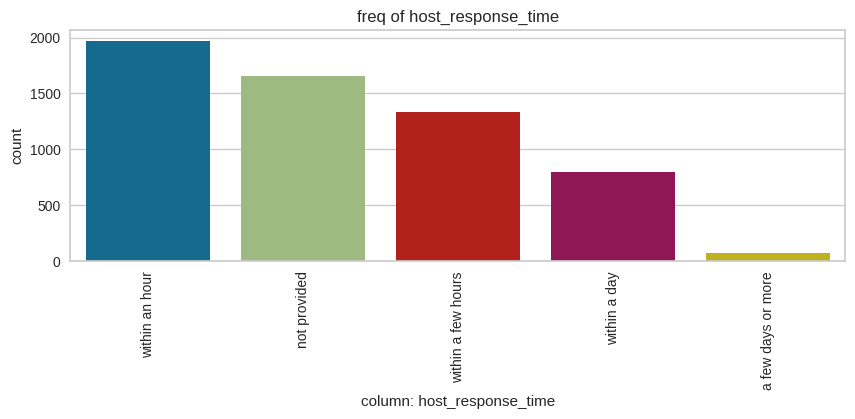

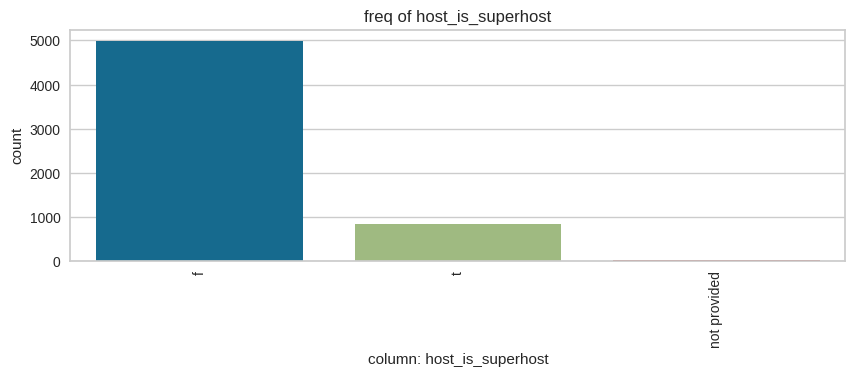

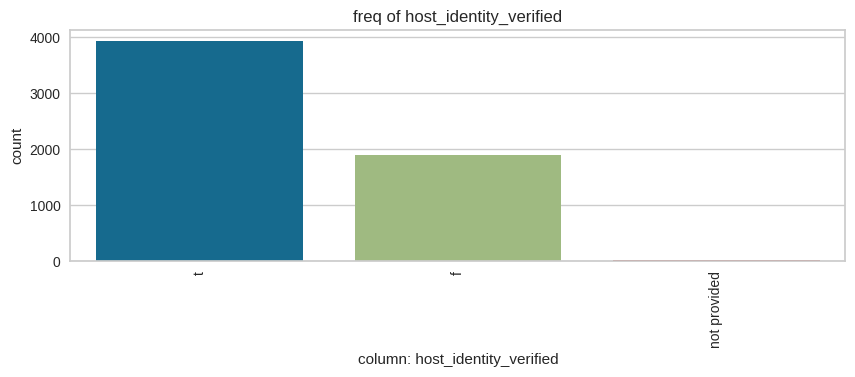

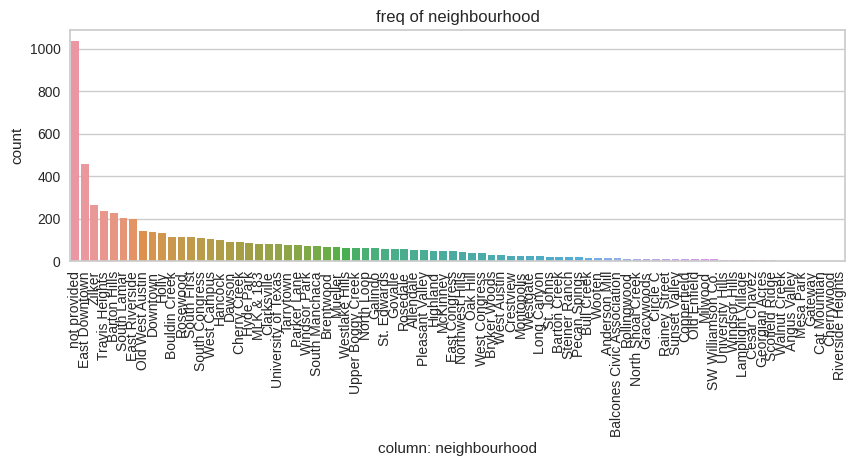

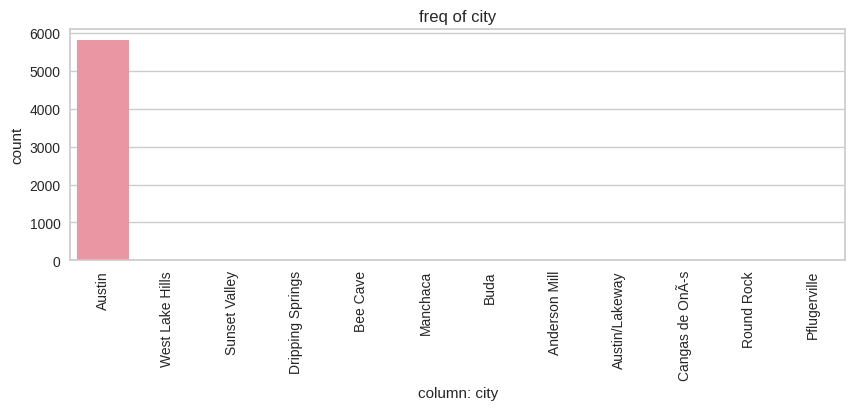

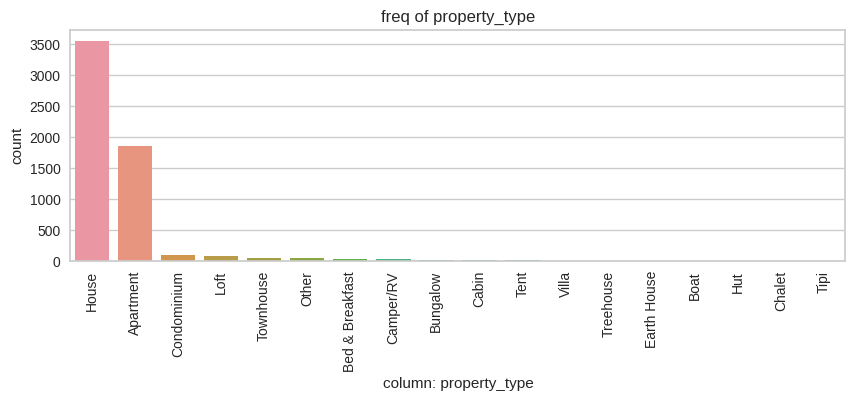

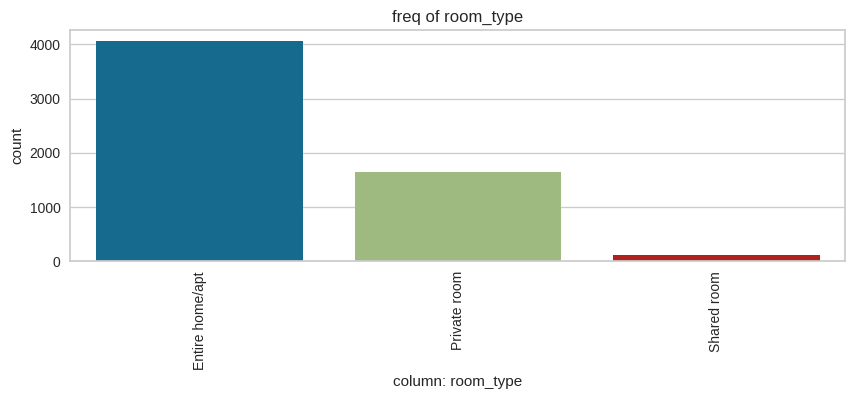

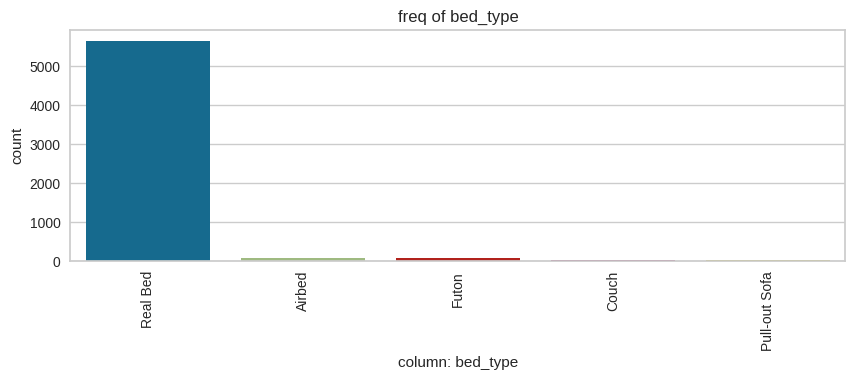

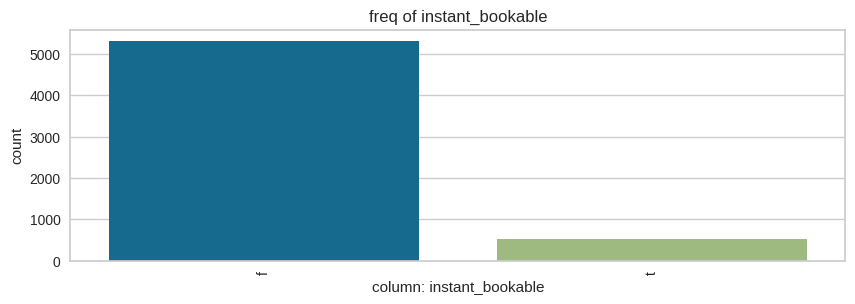

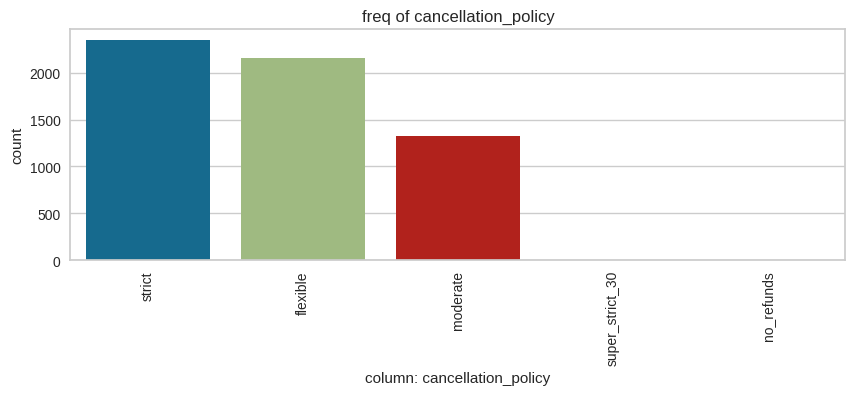

In [ ]:
# Create categorical column list
austin_categorical = ['host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city',
              'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']

# Create for loop to loop through all columns and create a count plot
austin_bnb['price'].median()
for column in austin_categorical:
  plt.figure(figsize=(10,3))
  sns.countplot(data=austin_bnb, x=column,
                order=austin_bnb[column].value_counts().index)
  plt.title(f"freq of {column}")
  plt.xlabel(f"column: {column}")
  plt.xticks(rotation=90)
  plt.ylabel("count");

In [ ]:
# Put all numeric columns into a list
numeric_col = austin_bnb.select_dtypes(include=[np.number]).columns
numeric_col

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'availability_30', 'availability_60',
       'availability_90', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

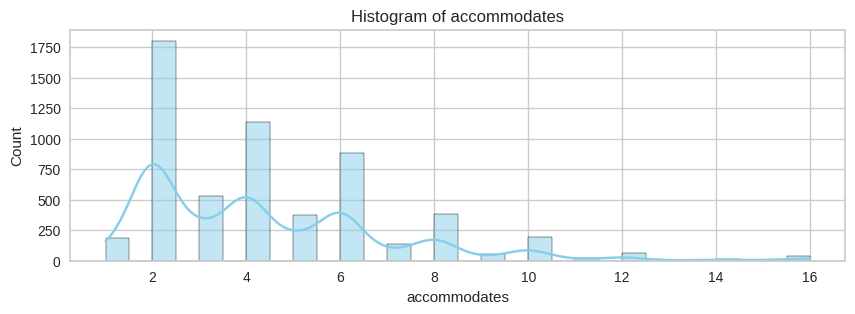

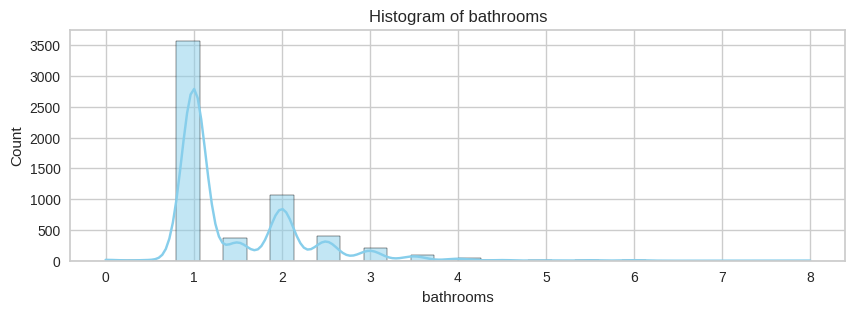

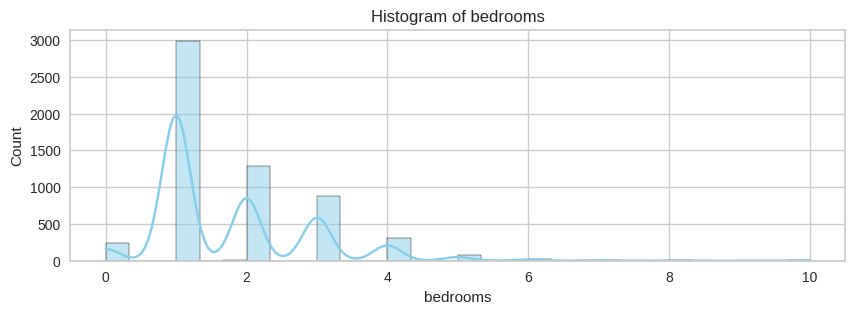

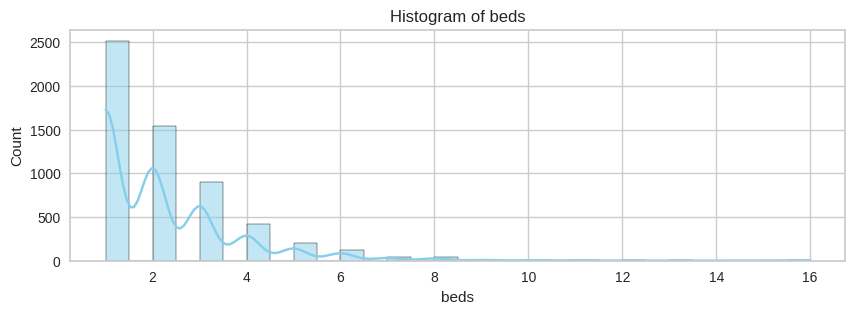

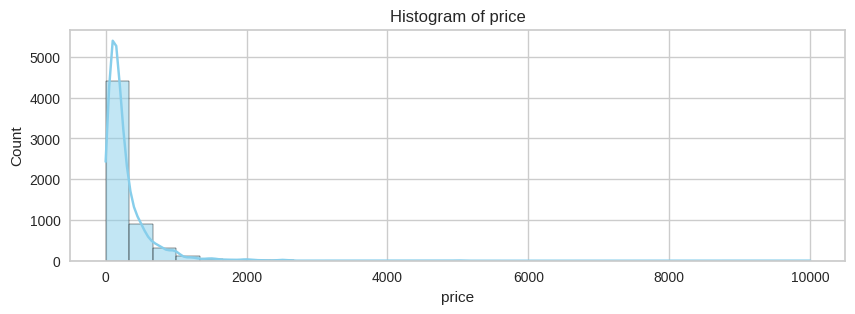

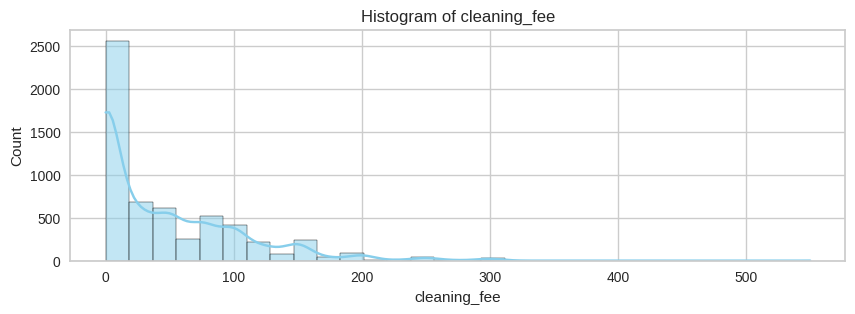

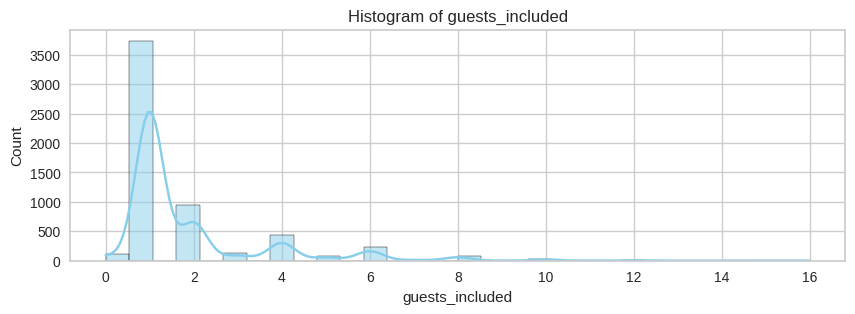

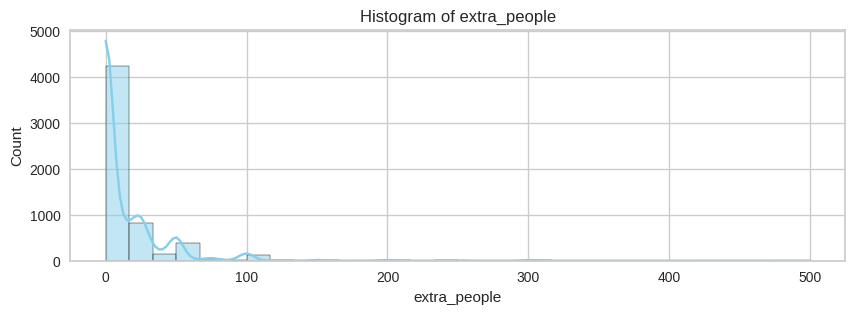

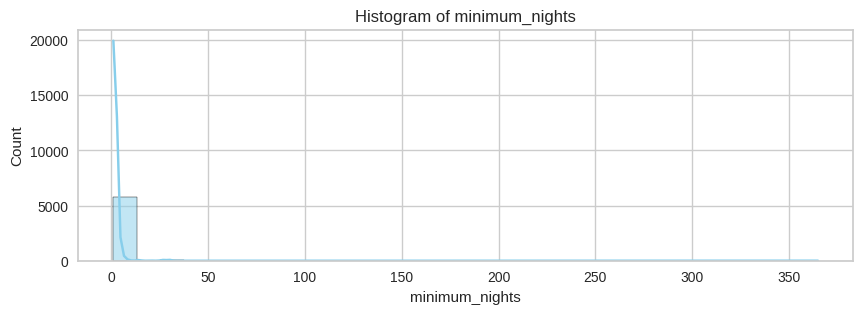

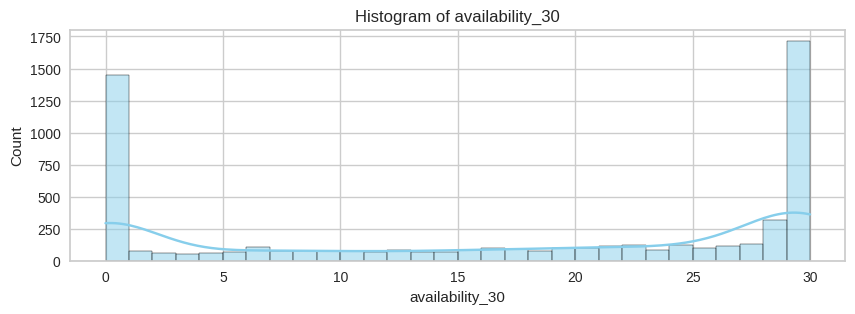

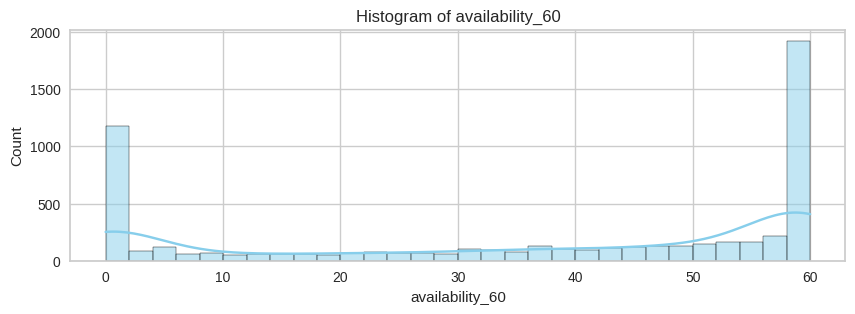

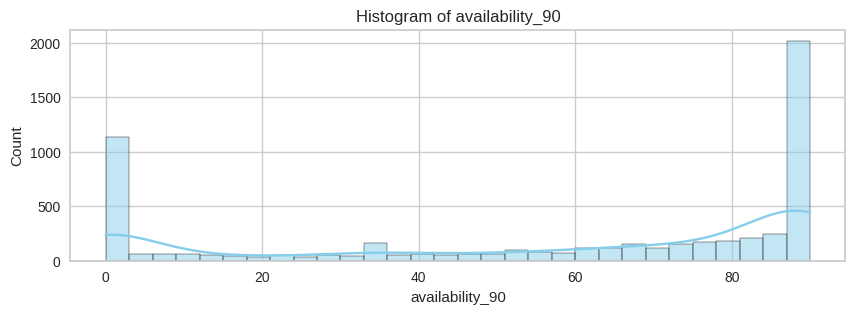

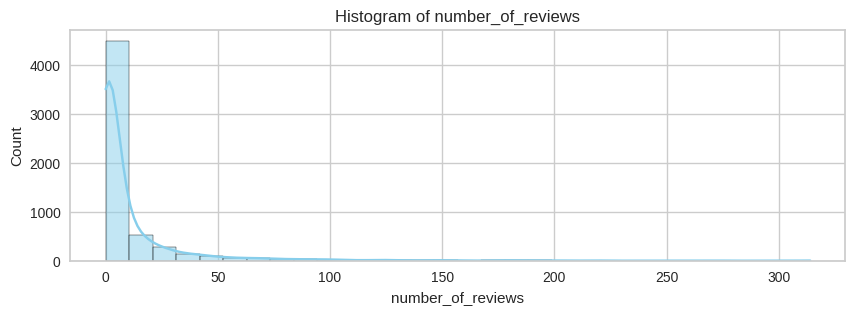

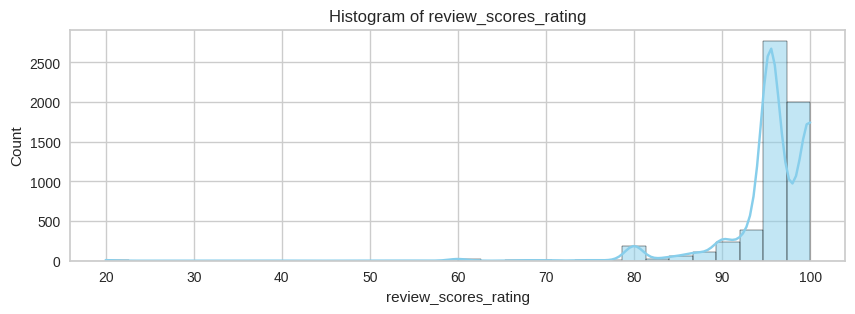

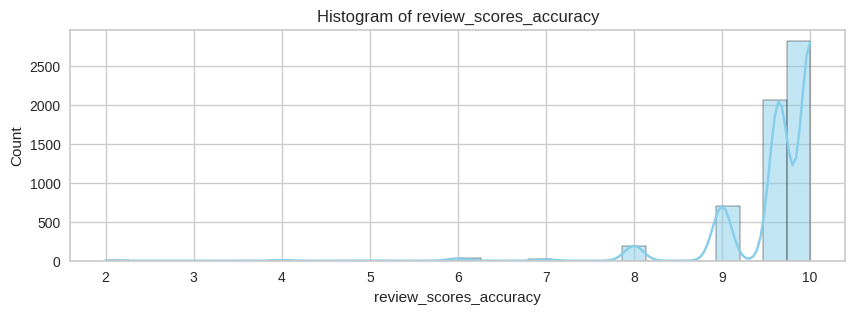

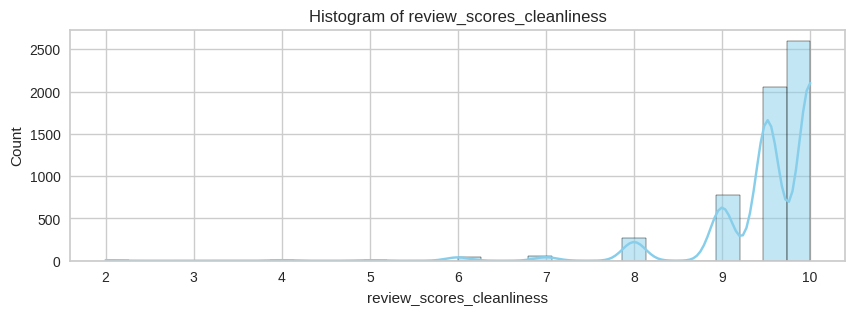

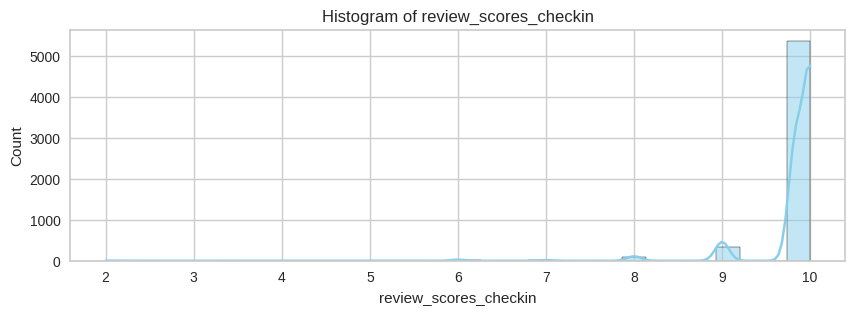

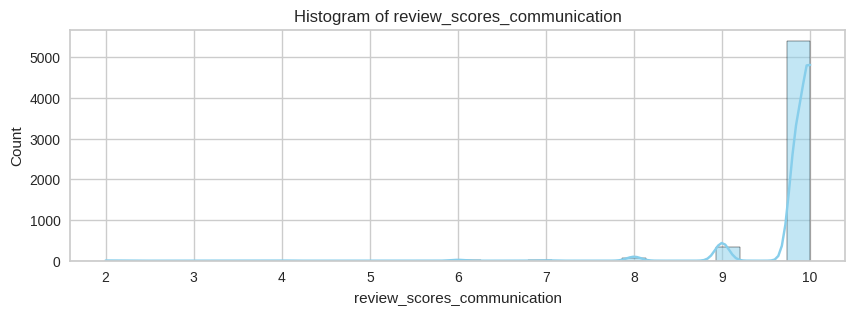

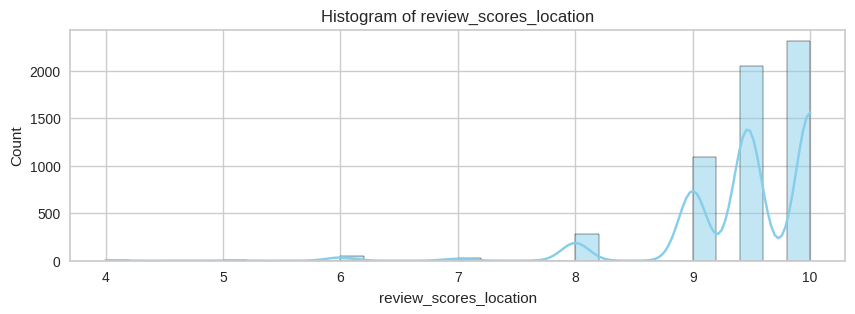

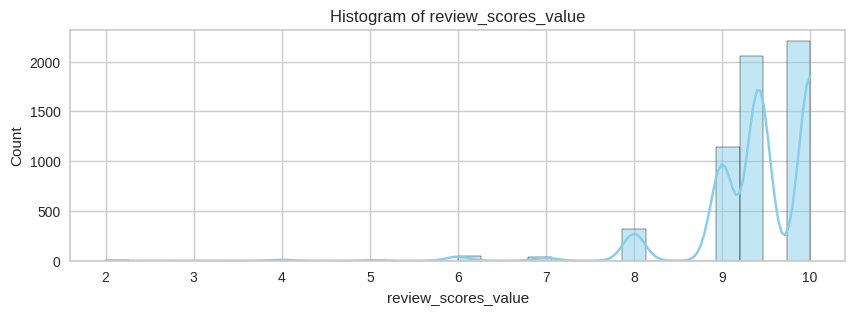

In [ ]:
austin_numeric = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

for feature in austin_numeric:

  plt.figure(figsize=(10, 3))
  sns.histplot(austin_bnb,x=feature, bins=30, kde=True, color='skyblue')
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.show()

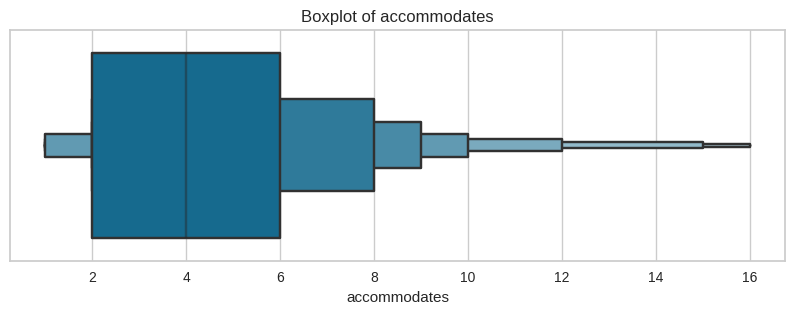

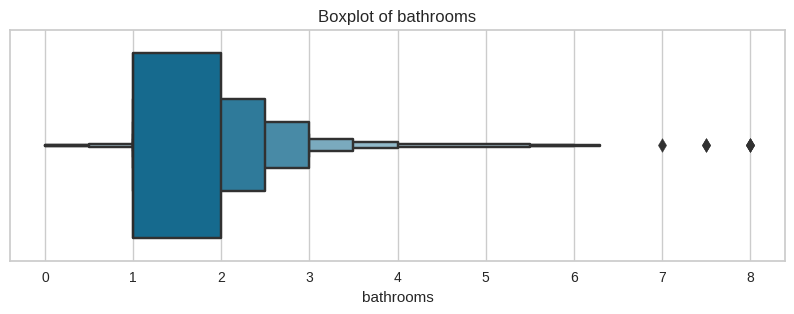

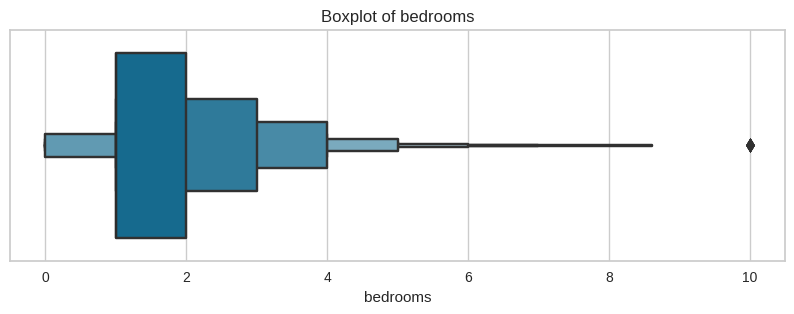

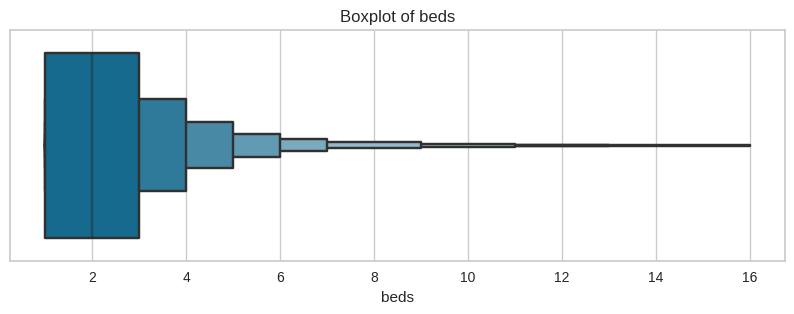

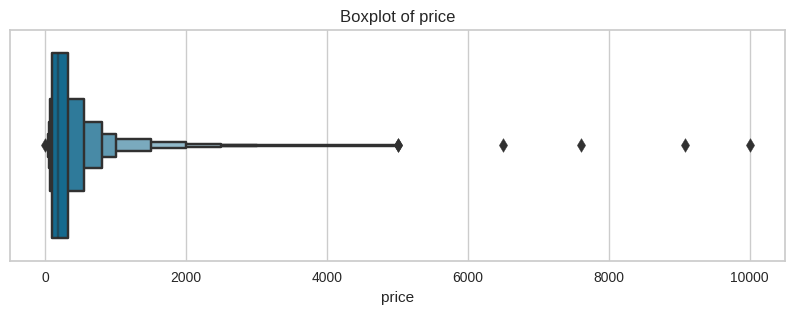

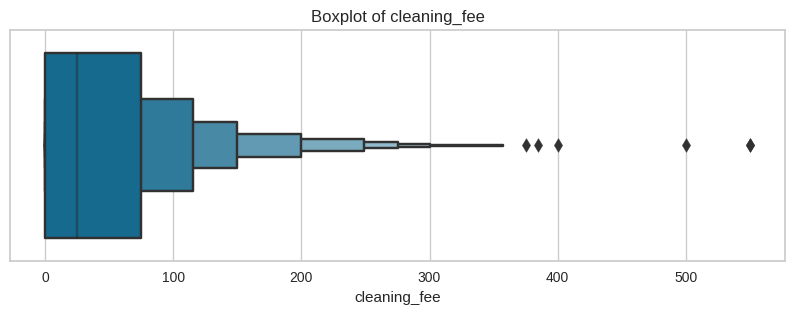

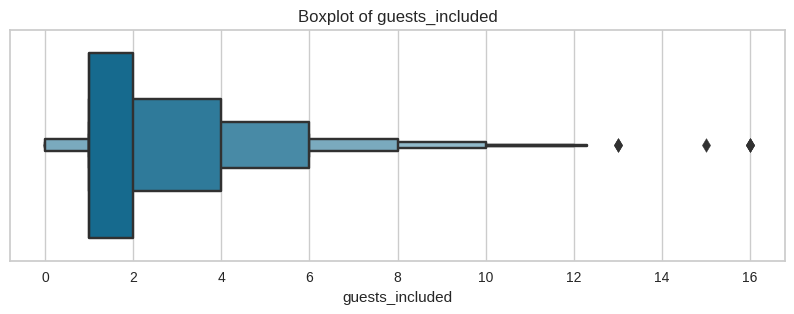

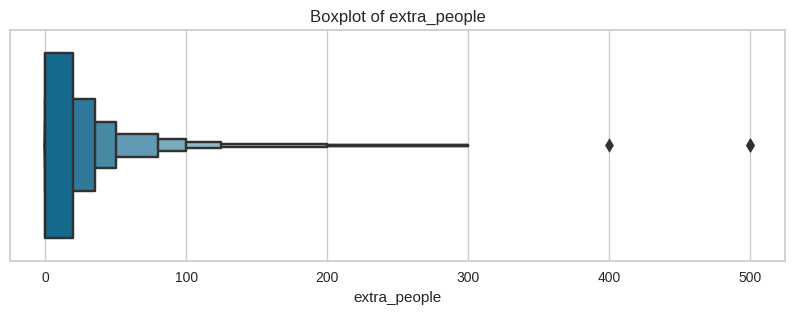

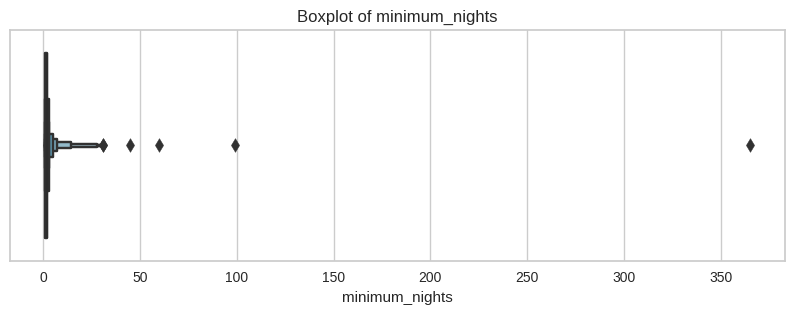

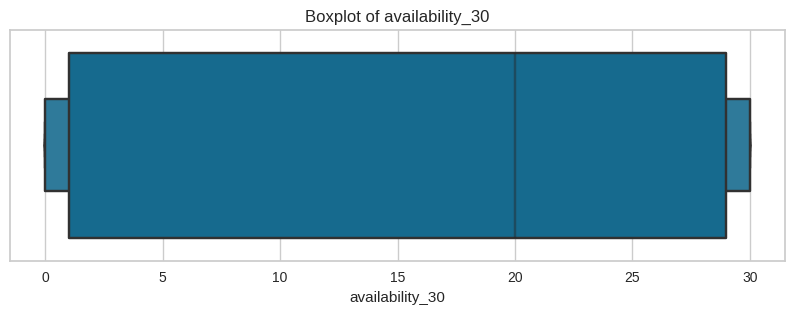

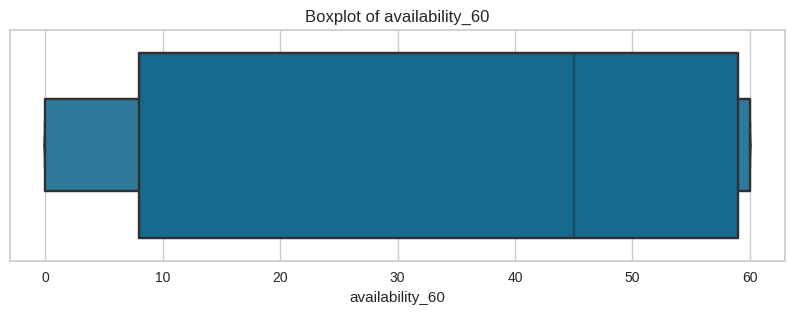

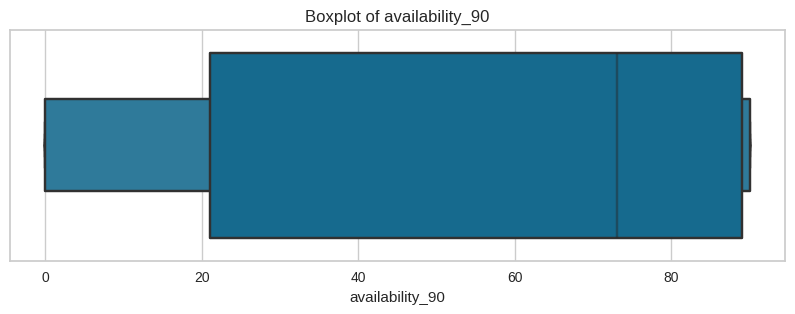

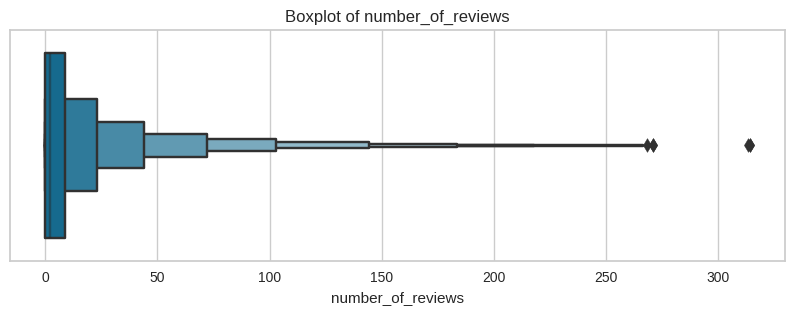

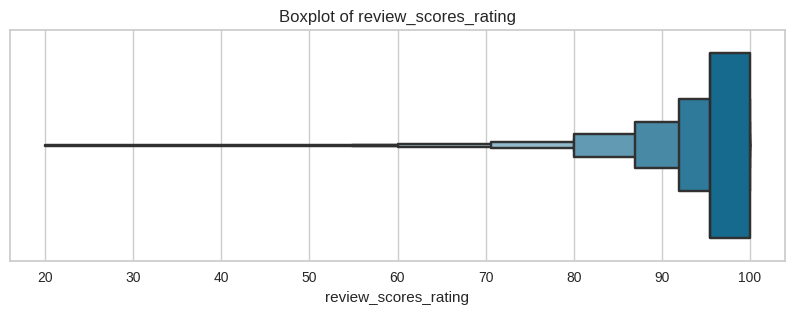

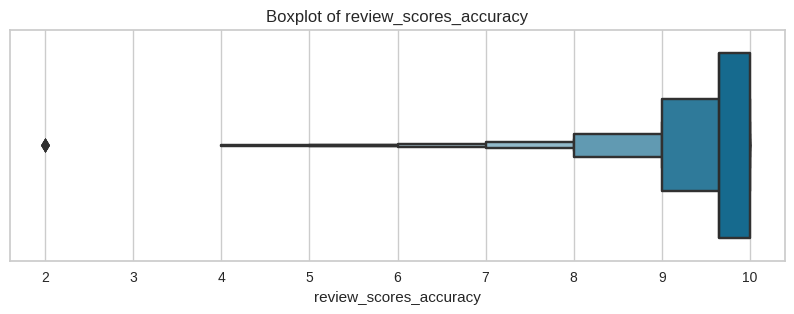

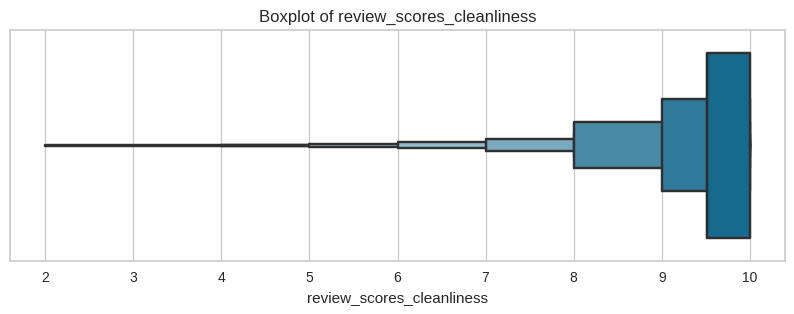

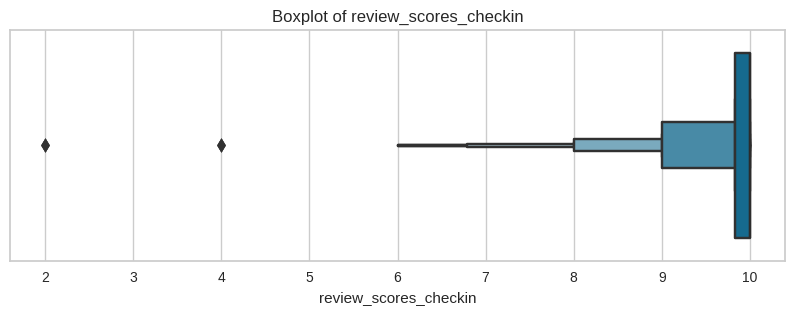

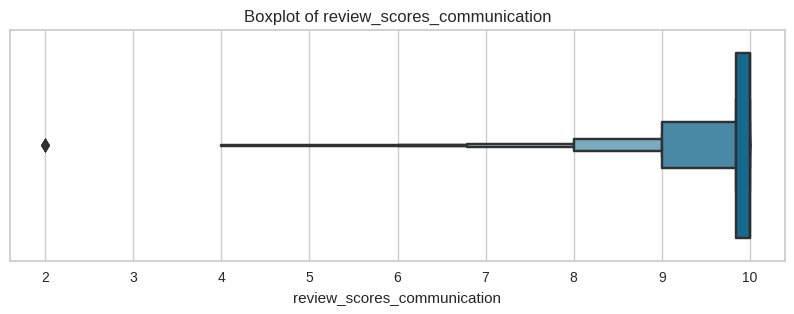

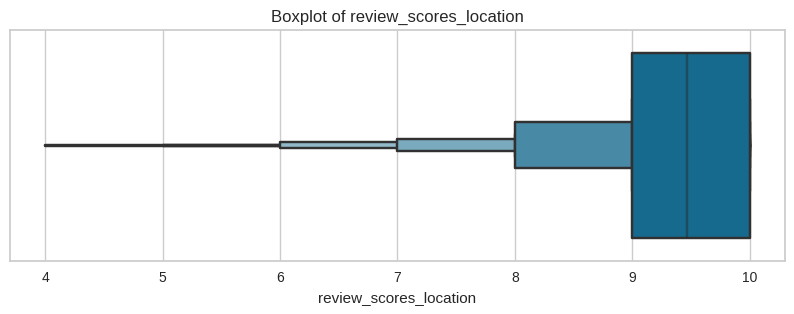

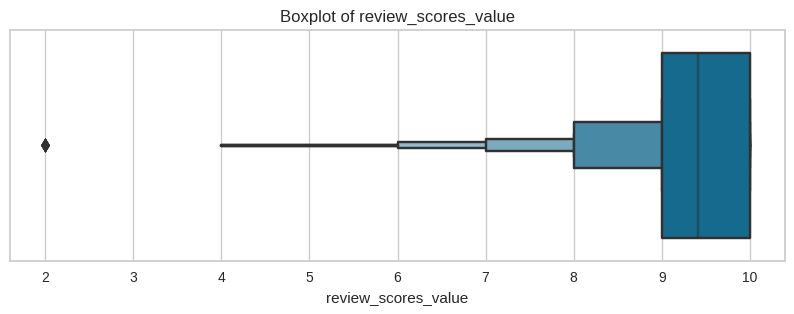

In [ ]:
# Boxplots of Numeric Columns
for feature in austin_numeric:

  plt.figure(figsize=(10, 3))
  sns.boxenplot(austin_bnb,x=feature)
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  plt.show()

#### What are the key factors driving the nightly rental price for units in the Austin area?

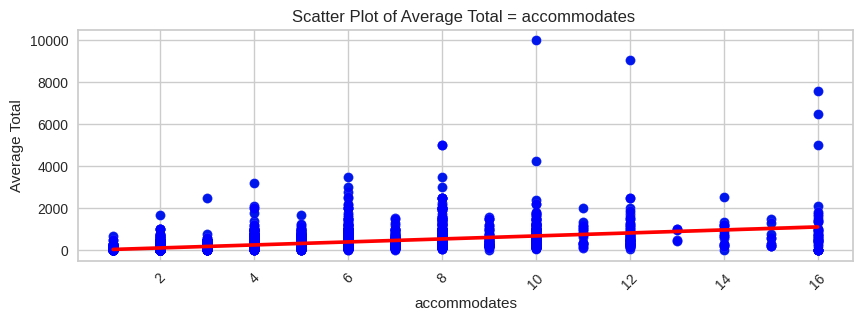

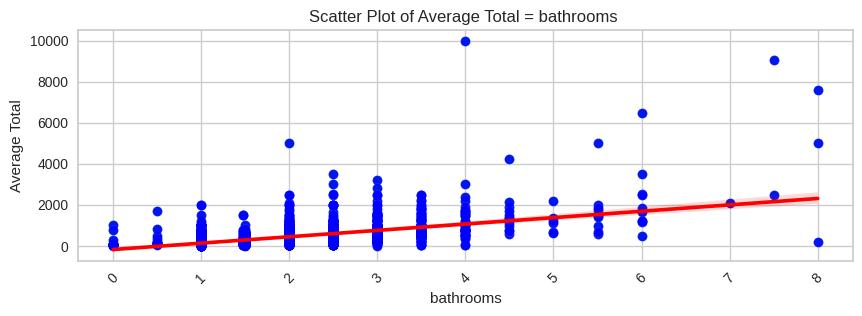

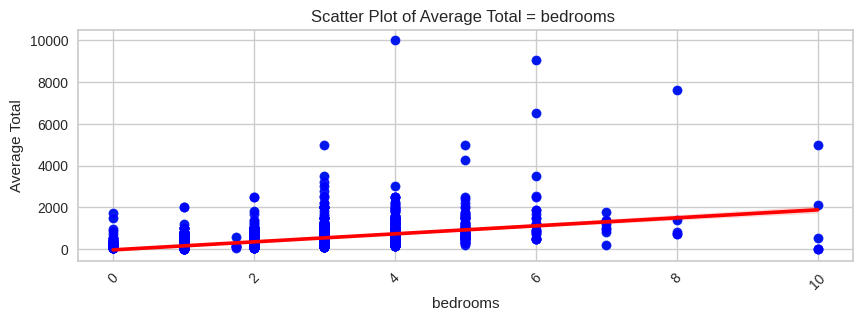

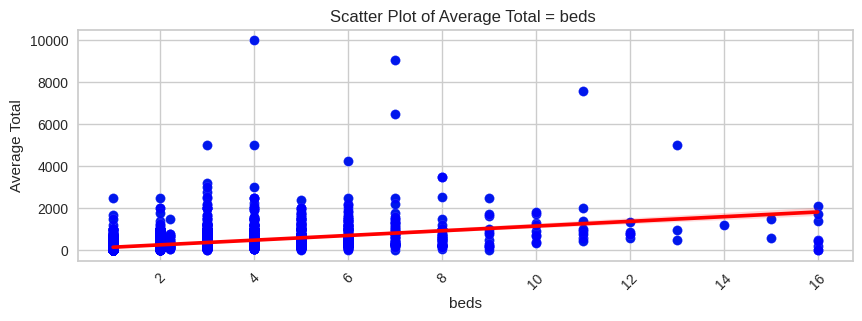

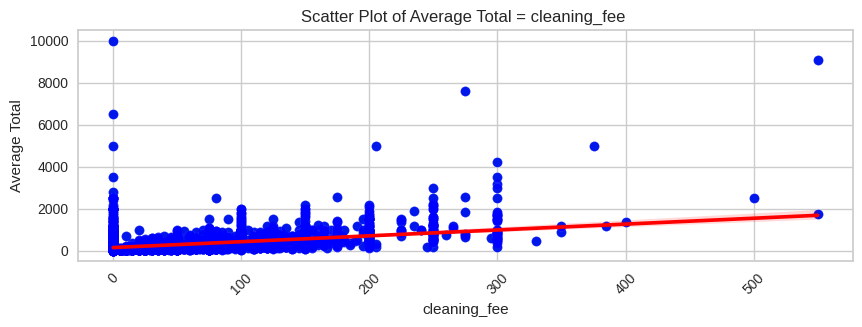

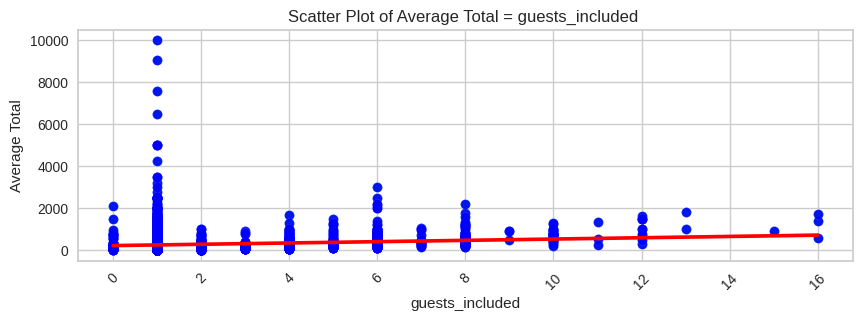

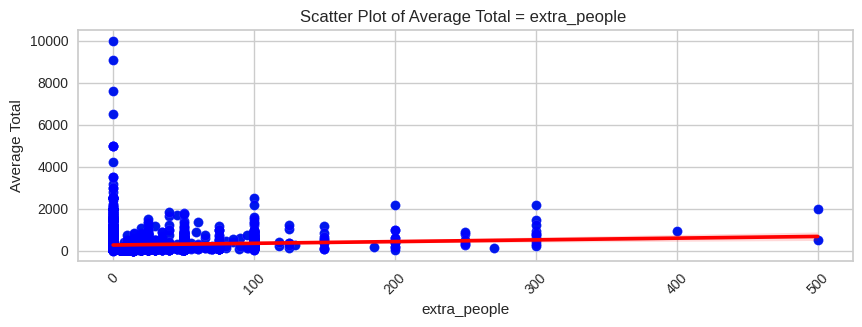

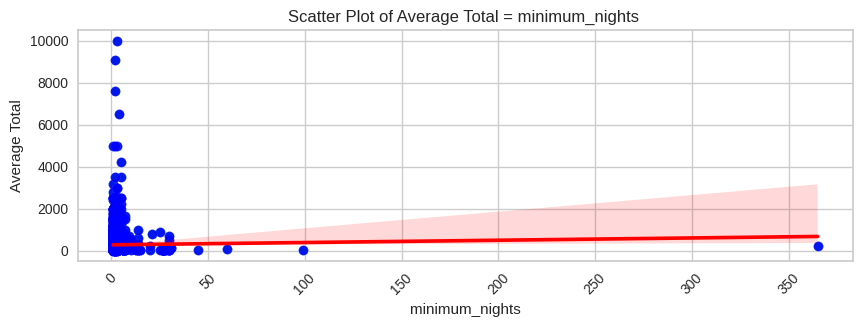

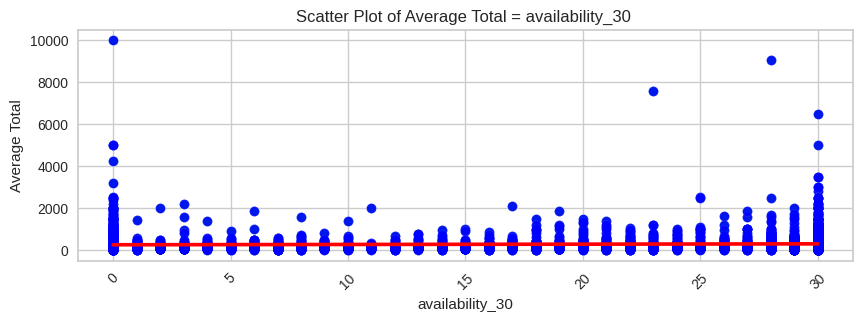

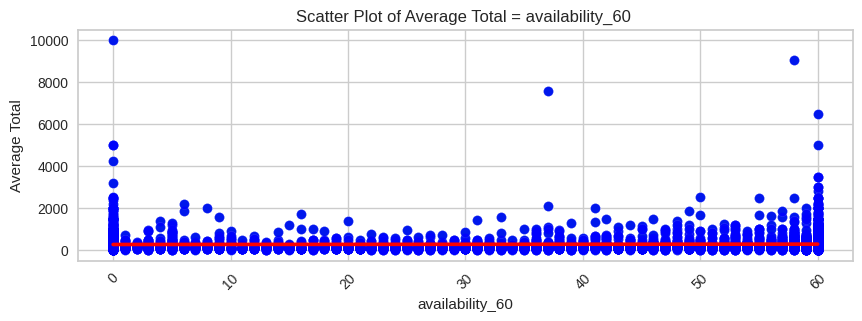

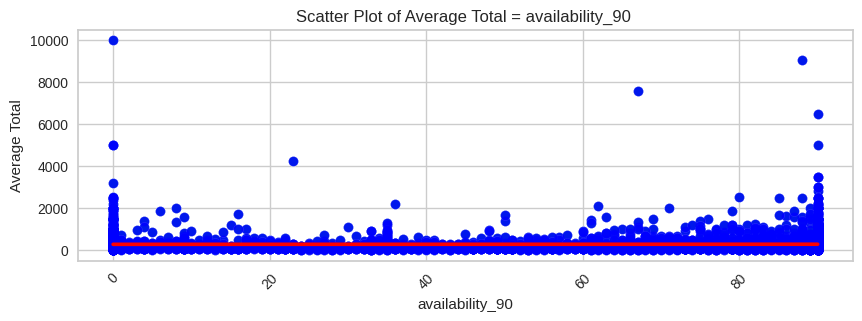

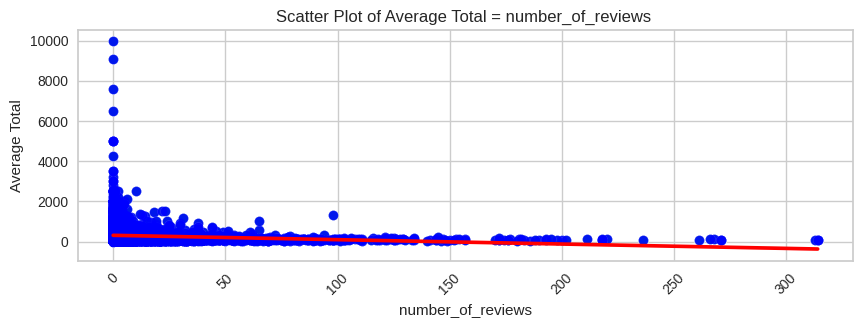

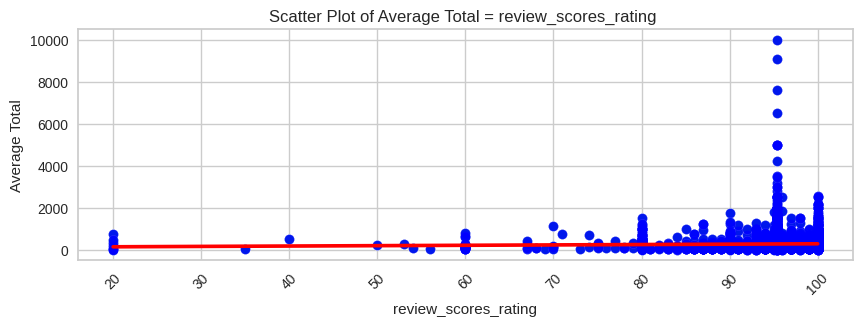

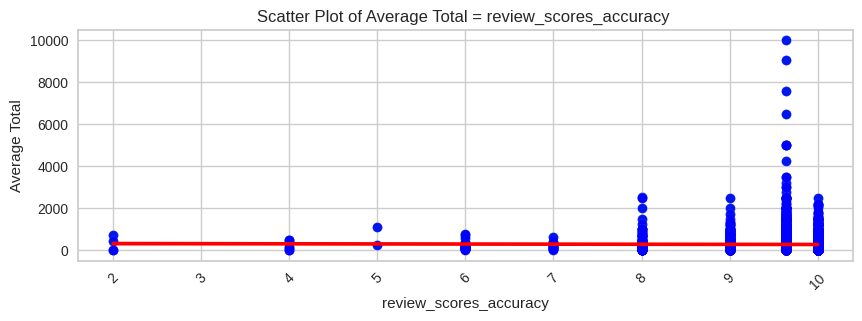

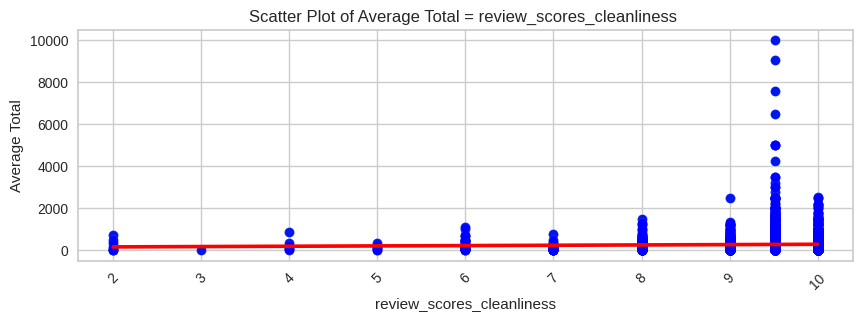

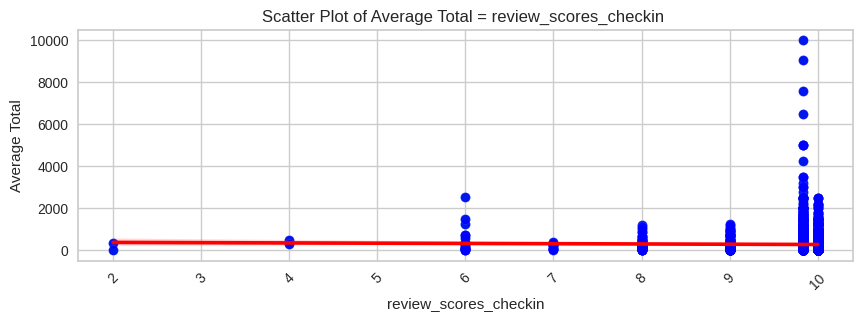

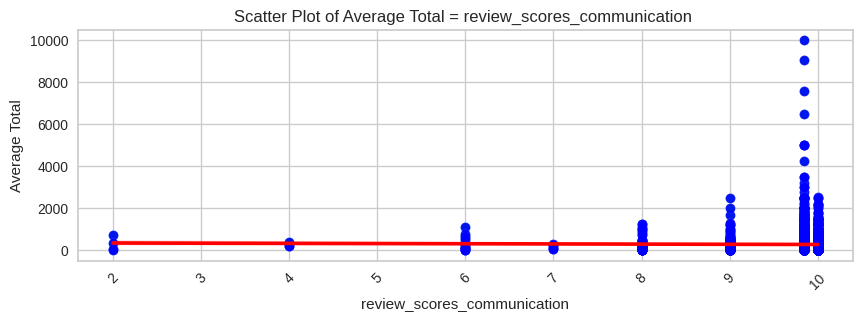

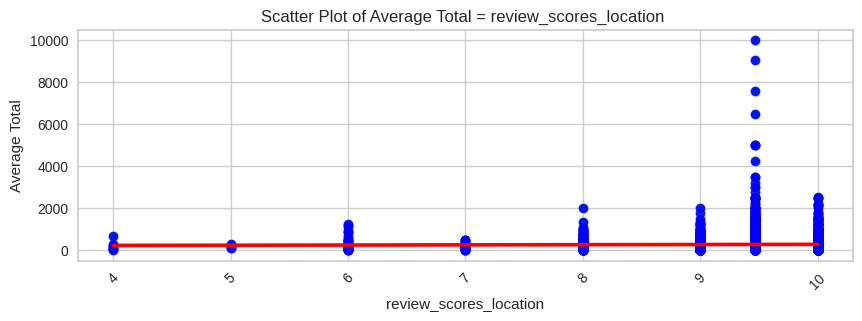

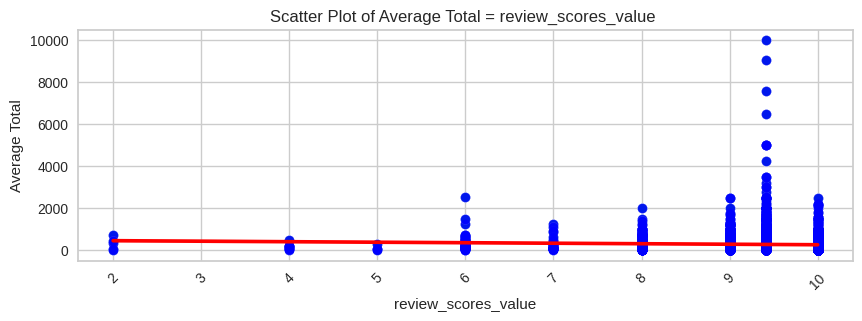

In [ ]:
# Create scatterplots and boxplots to show potential linear relationships for nightly price
for feature in austin_numeric:
 if feature != 'price':

    plt.figure(figsize=(10, 3))
    sns.scatterplot(austin_bnb,x=feature, y='price')
    sns.regplot(austin_bnb,x=feature, y='price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of Average Total = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Average Total')
    plt.xticks(rotation=45)
    plt.show()

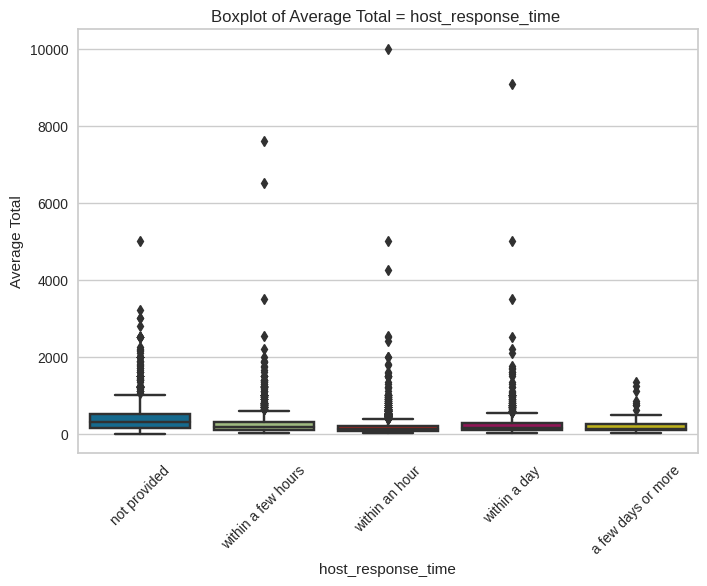

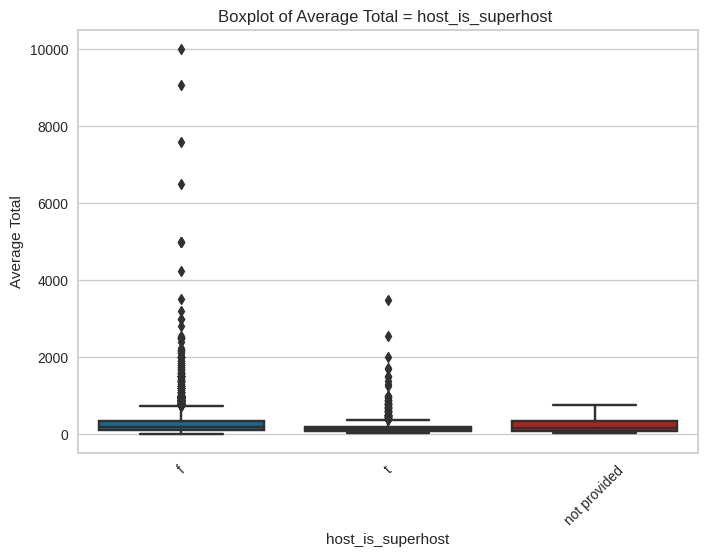

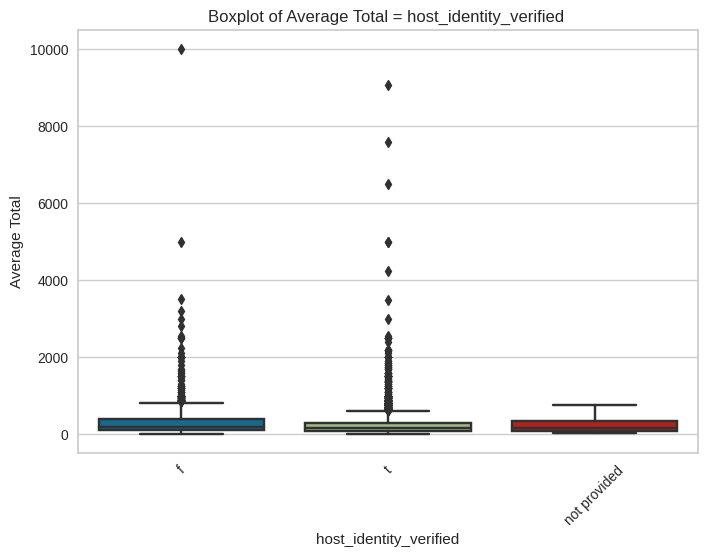

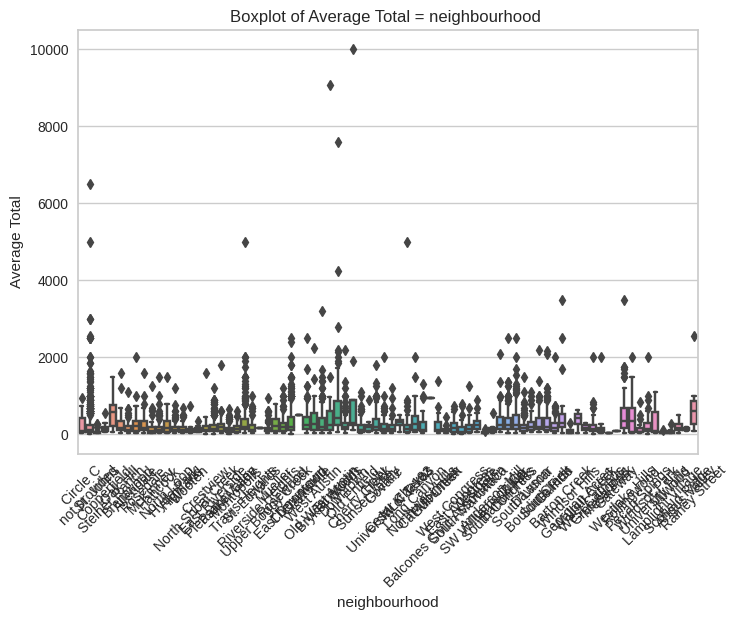

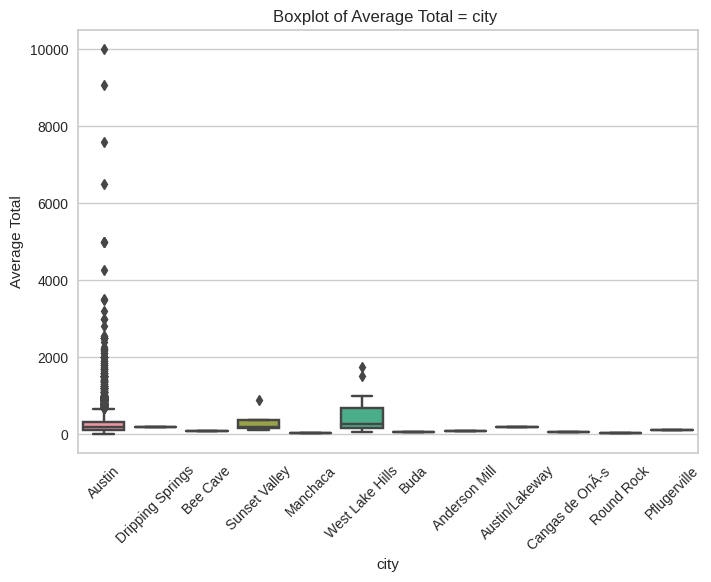

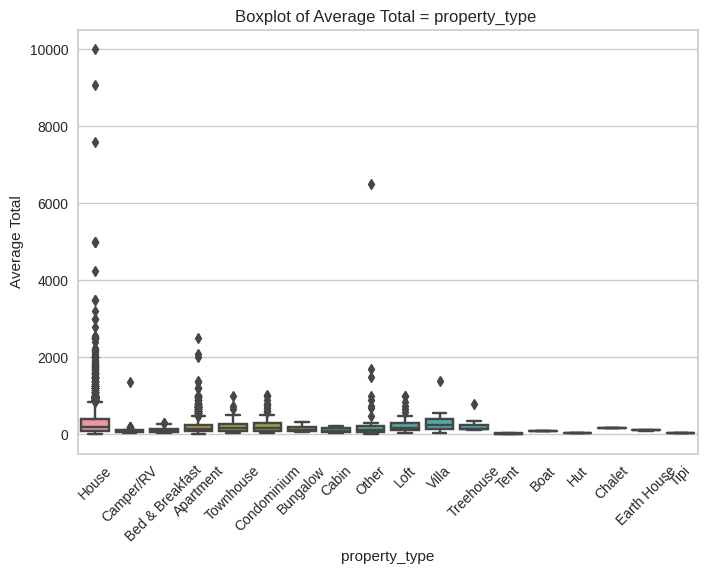

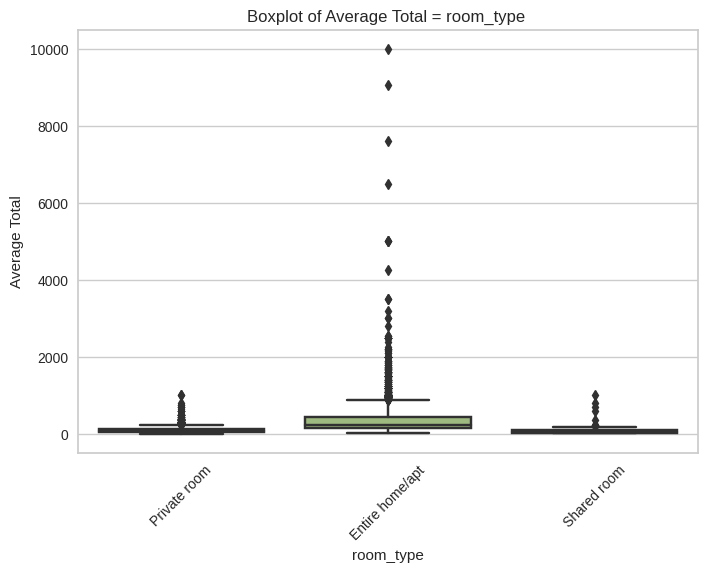

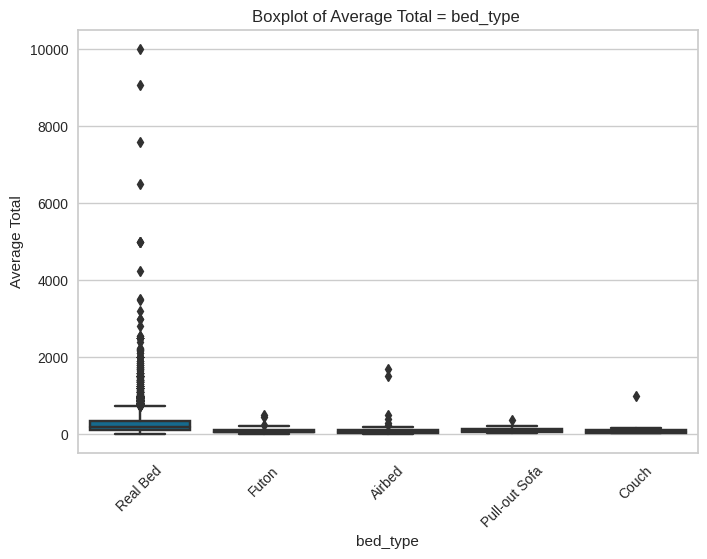

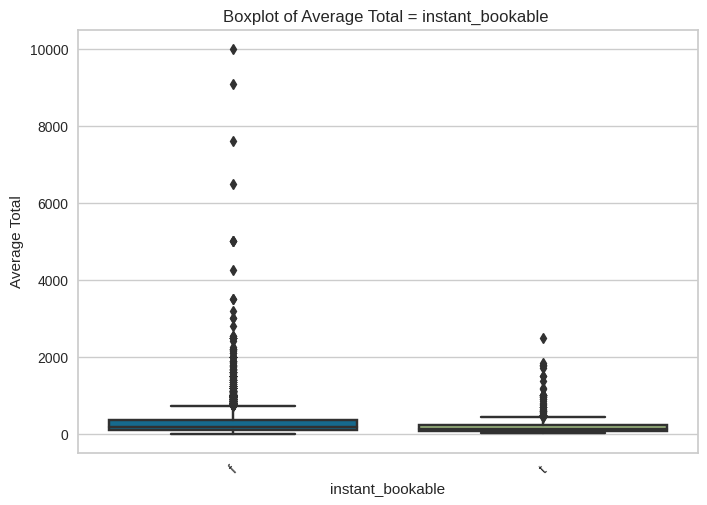

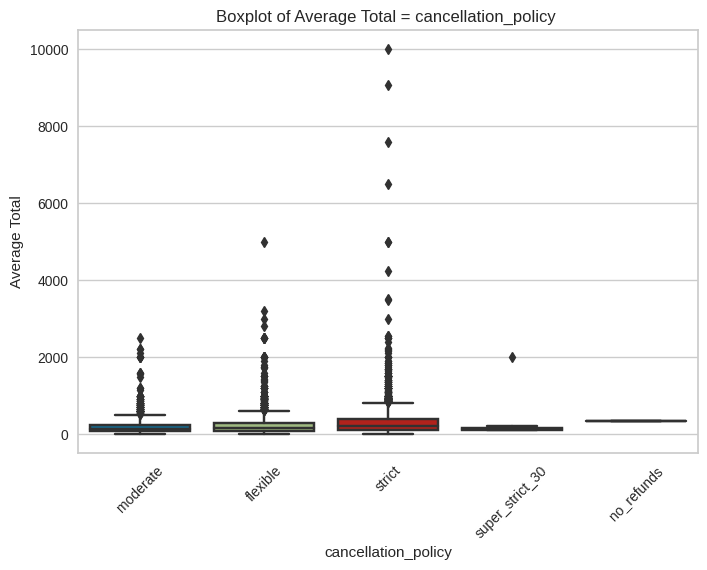

In [ ]:
# Boxplots
for category in austin_categorical:

  sns.boxplot(austin_bnb,x=category, y='price')
  plt.title(f'Boxplot of Average Total = {category} ')
  plt.xlabel(category)
  plt.ylabel('Average Total')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
# Compute the correlation of each variable with price
correlations = austin_bnb[austin_numeric].apply(lambda x: x.corr(austin_bnb['price']))
price_correlations = correlations.to_frame(name='correlation')
price_correlations = price_correlations.sort_values('correlation', ascending=False)
price_correlations

correlation
price                           1.000000
bathrooms                       0.594774
bedrooms                        0.541275
accommodates                    0.476145
beds                            0.456678
cleaning_fee                    0.411318
guests_included                 0.136695
extra_people                    0.060012
availability_30                 0.044624
review_scores_cleanliness       0.028781
review_scores_rating            0.025868
availability_60                 0.016321
minimum_nights                  0.015142
review_scores_location          0.014104
availability_90                 0.004672
review_scores_accuracy         -0.007962
review_scores_communication    -0.009759
review_scores_checkin          -0.013676
review_scores_value            -0.042818
number_of_reviews              -0.136838

### Fit Full Linear Regression Model
##### the Y variable will be price to determine key factors of nightly pricing

In [ ]:
# Fit full regression
# drop all categorical data, as well as price
X = austin_bnb.drop(columns=['price', 'host_since', 'host_response_time','host_is_superhost','host_identity_verified','neighbourhood','city','property_type','room_type','bed_type','instant_bookable','cancellation_policy'])
y = austin_bnb['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     196.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:07:30   Log-Likelihood:                -41782.
No. Observations:                5835   AIC:                         8.361e+04
Df Residuals:                    5814   BIC:                         8.375e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                       Variable         VIF
0                         const  681.044768
1           host_listings_count    1.183759
2                  accommodates    4.142772
3                     bathrooms    2.501580
4                      bedrooms    4.195017
5                          beds    3.656588
6                  cleaning_fee    1.804309
7               guests_included    1.715036
8                  extra_people    1.322764
9                minimum_nights    1.007677
10              availability_30   13.996741
11              availability_60   47.609137
12              availability_90   23.940127
13            number_of_reviews    1.075320
14         review_scores_rating    2.866334
15       review_scores_accuracy    1.954969
16    review_scores_cleanliness    2.040643
17        review_scores_checkin    1.856253
18  review_scores_communication    1.966542
19       review_scores_location    1.304566
20          review_scores_value    2.045555


#### There are multiple columns which are not significant values. Some columns to look at dropping are beds, minimum_nights, availability_60,review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, and review_scores_communication. I will keep review_scores_rating for now, but I am considering also removing this column from the model. Looking at the VIF scores, it is highly concerning the availability for 30, 60, and 90 are extremely high. This will need to be taken care of.

### Create a Stepwise Function

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  bedrooms with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  const with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  guests_included with p-value 0.0000
Add  host_listings_count with p-value 0.0000
Add  number_of_reviews with p-value 0.0000
Add  accommodates with p-value 0.0000
Add  extra_people with p-value 0.0014
resulting features:
['bedrooms', 'bathrooms', 'const', 'cleaning_fee', 'guests_included', 'host_listings_count', 'number_of_reviews', 'accommodates', 'extra_people']


In [ ]:
# Fit stepwise regression
# exclude all categorical columns and columns listed above which are not significant values
X = austin_bnb[['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     350.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:07:31   Log-Likelihood:                -41805.
No. Observations:                5835   AIC:                         8.363e+04
Df Residuals:                    5823   BIC:                         8.371e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -216

In [ ]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

                  Variable         VIF
0                    const  343.953651
1      host_listings_count    1.162803
2             accommodates    3.196461
3                bathrooms    2.442949
4                 bedrooms    3.967821
5             cleaning_fee    1.776057
6          guests_included    1.701313
7             extra_people    1.317263
8        number_of_reviews    1.034682
9     review_scores_rating    1.857693
10  review_scores_location    1.289246
11     review_scores_value    1.900652


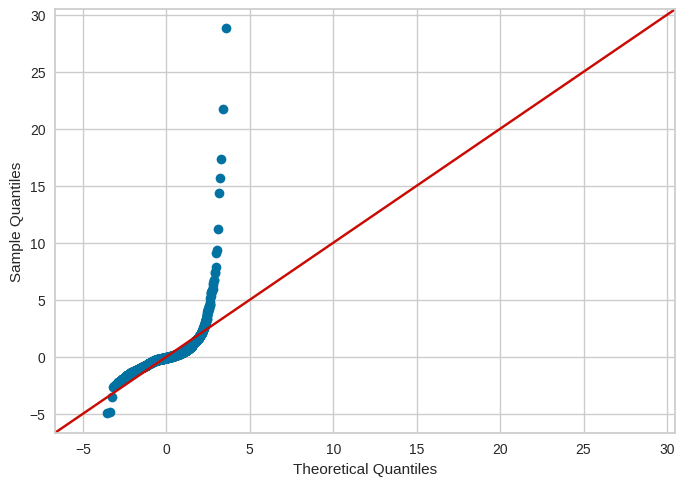

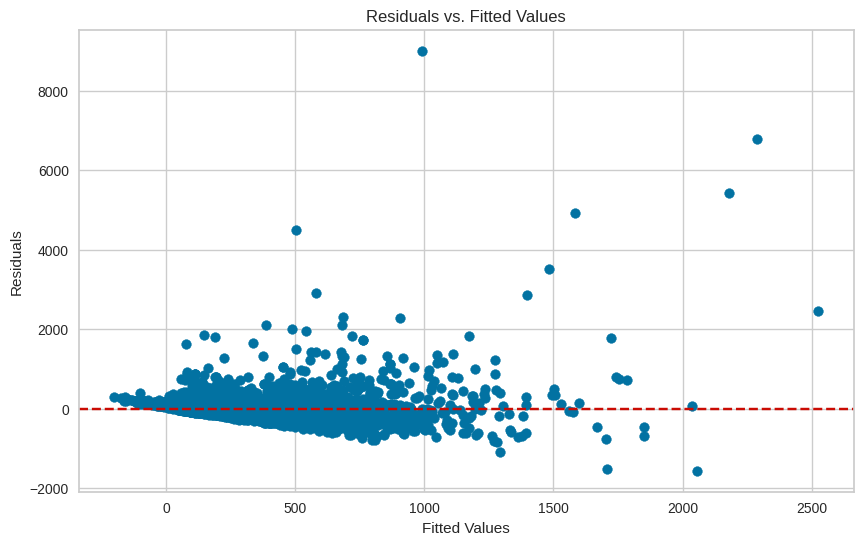

In [ ]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

#### I tried a stepwise regression because there was still a considerable about of columns which could be highly coorelated to Price. Majority of the columns are significant values. The columns of review_scores_ratings and review_scores_location are of slight concern. All of the VIFs are below 5 which is a good sign. With that being said, the Q-Q Plot is of high concern. To combat the Q-Q plot output, I will next try a square root regression.

### Square Root Regression

In [ ]:
# log transformed regression
X = austin_bnb[['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     564.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -18150.
No. Observations:                5835   AIC:                         3.632e+04
Df Residuals:                    5823   BIC:                         3.640e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

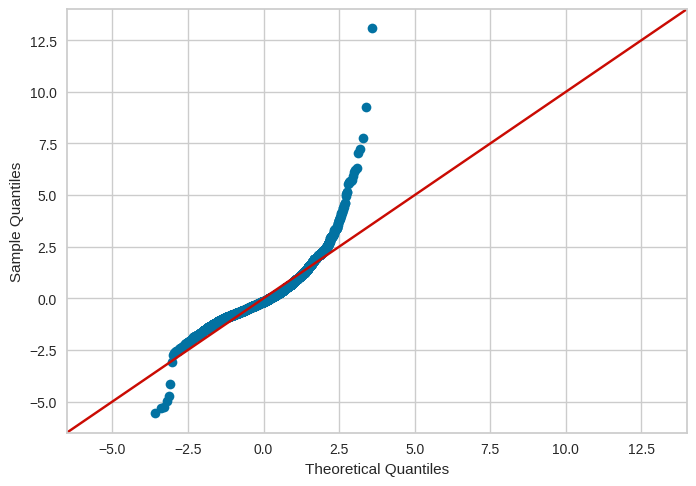

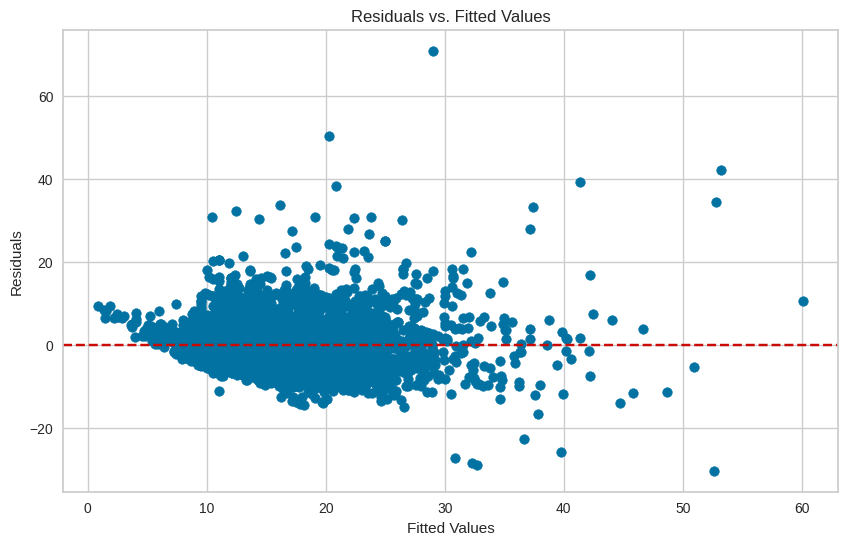

In [ ]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

#### This linear regression could use some more cleaning and adjusting. There was improvement from the full regression to the square root regression. Now all of the variables are significant and there is no concern over the VIF values. There is concern over the Q-Q plot.

### Decision Tree
##### a decision tree will assist in determining the key factors driving the probability of keeping a unit booked and how important are guest reviews and ratings

In [ ]:
# Create a booked column which represents the 90 day availability is less than 40%
day90_booked = austin_bnb['availability_90'] < 0.4
booked = pd.DataFrame(day90_booked)
booked.columns=[booked]
austin_bnb['booked'] = booked
austin_bnb

host_since  host_response_time host_is_superhost  host_listings_count  \
0          2011        not provided                 f                  1.0   
1          2015        not provided                 f                  1.0   
2          2015        not provided                 f                  2.0   
3          2015        not provided                 f                  2.0   
4          2015  within a few hours                 f                301.0   
...         ...                 ...               ...                  ...   
5830       2013  within a few hours                 t                 21.0   
5831       2015      within an hour                 f                  4.0   
5832       2014      within an hour                 f                  5.0   
5833       2015  a few days or more                 f                  2.0   
5834       2014        not provided                 f                  1.0   

     host_identity_verified neighbourhood             city property_type  \
0                         f      Circle C           Austin         House   
1                         t      Circle C           Austin     Camper/RV   
2                         t  not provided           Austin         House   
3                         t  not provided           Austin         House   
4                         t  not provided           Austin         House   
...                     ...           ...              ...           ...   
5830                      t      Downtown           Austin     Apartment   
5831                      t      Downtown           Austin   Condominium   
5832                      f  not provided  Cangas de OnÃ­s         House   
5833                      t  not provided       Round Rock     Apartment   
5834                      t  not provided     Pflugerville     Apartment   

            room_type  accommodates  ...  review_scores_rating  \
0        Private room             6  ...            100.000000   
1        Private room             2  ...             95.435735   
2        Private room             2  ...             95.435735   
3        Private room             2  ...             95.435735   
4     Entire home/apt             6  ...             95.435735   
...               ...           ...  ...                   ...   
5830  Entire home/apt             4  ...            100.000000   
5831     Private room             2  ...             95.435735   
5832  Entire home/apt             2  ...            100.000000   
5833      Shared room             1  ...             95.435735   
5834  Entire home/apt             2  ...             95.435735   

      review_scores_accuracy  review_scores_cleanliness review_scores_checkin  \
0                  10.000000                  10.000000             10.000000   
1                   9.645657                   9.515881              9.830863   
2                   9.645657                   9.515881              9.830863   
3                   9.645657                   9.515881              9.830863   
4                   9.645657                   9.515881              9.830863   
...                      ...                        ...                   ...   
5830               10.000000                  10.000000             10.000000   
5831                9.645657                   9.515881              9.830863   
5832                8.000000                  10.000000             10.000000   
5833                9.645657                   9.515881              9.830863   
5834                9.645657                   9.515881              9.830863   

      review_scores_communication  review_scores_location  \
0                       10.000000               10.000000   
1                        9.839068                9.468378   
2                        9.839068                9.468378   
3                        9.839068                9.468378   
4                        9.839068                9.468378   
...                    

In [ ]:
# split the data into training and testing sets
X2 = austin_bnb.drop(columns = ['booked', 'availability_30', 'availability_60', 'availability_90'], axis=1)
X2 = austin_bnb[['host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'bedrooms', 'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy']]
X2 = pd.get_dummies(X2, columns=['host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city',
              'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy'], drop_first=True)

y2 = austin_bnb['booked']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Columns: 148 entries, bedrooms to cancellation_policy_super_strict_30
dtypes: float64(9), int64(5), uint8(134)
memory usage: 1013.0 KB
<class 'pandas.core.series.Series'>
Int64Index: 4084 entries, 2313 to 860
Series name: booked
Non-Null Count  Dtype
--------------  -----
4084 non-null   bool 
dtypes: bool(1)
memory usage: 35.9 KB


In [ ]:
# create an instance of a decision tree classifier
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X2.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

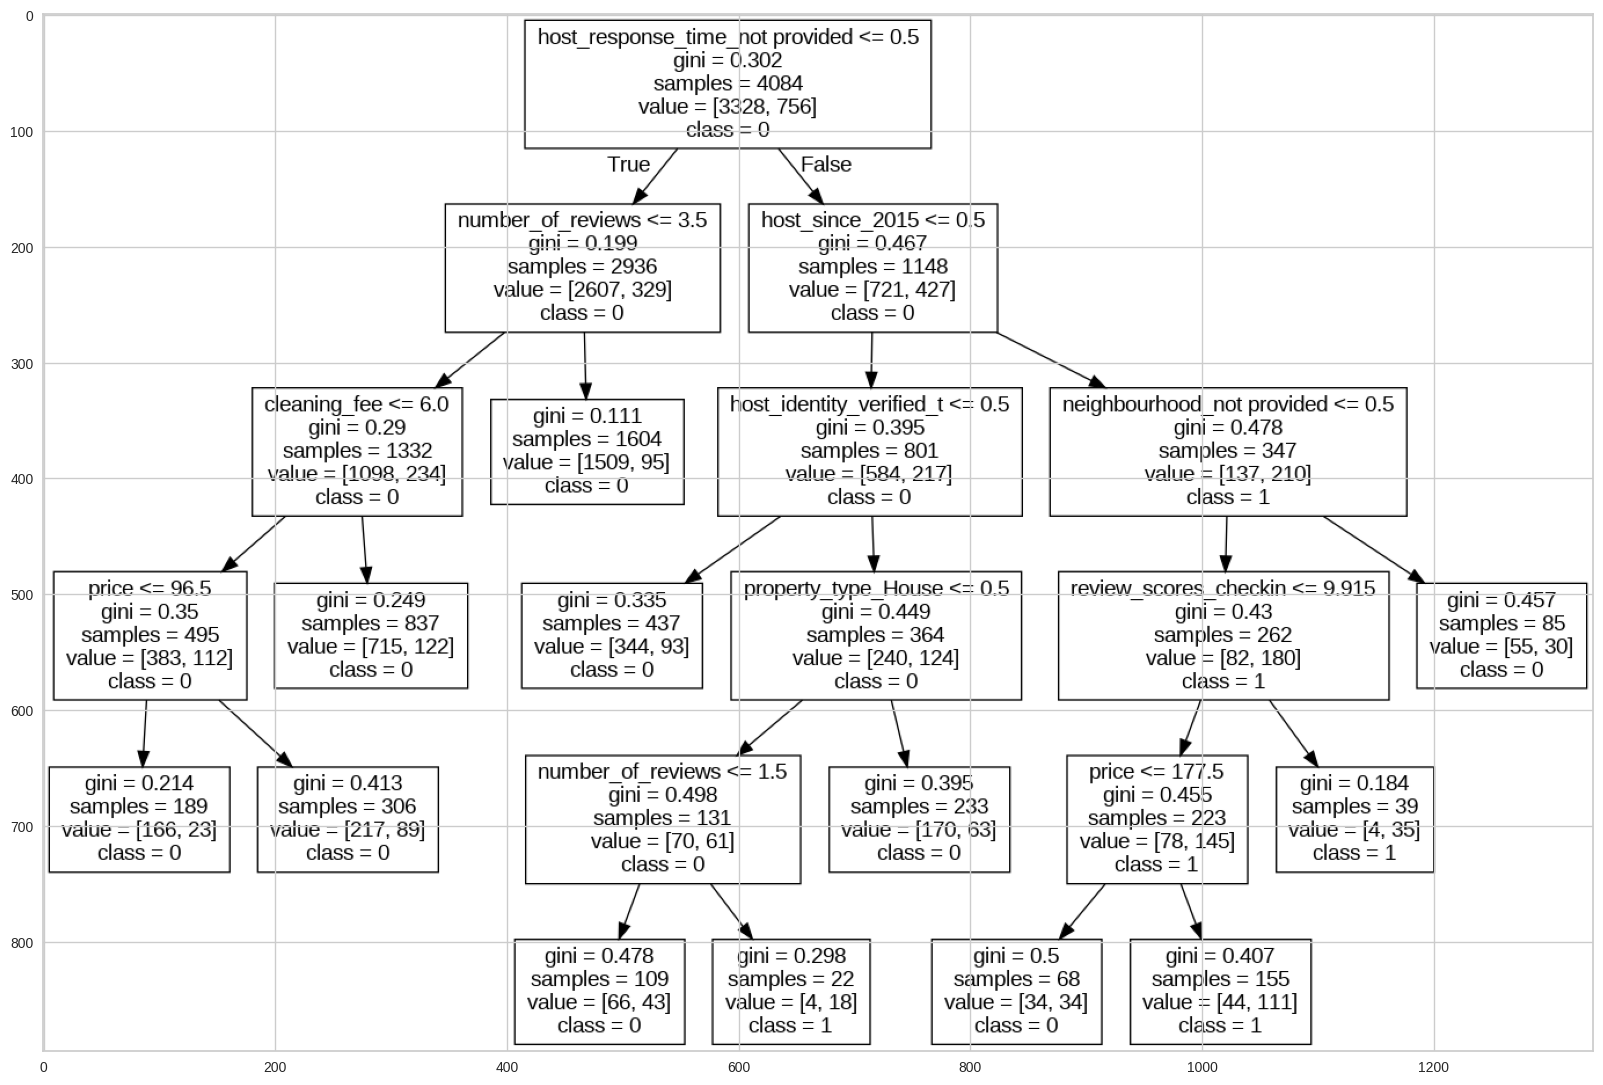

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X2_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

### Make a prediction on the test and training test

In [ ]:
# make predictions on the training and test data
y2_pred_train = dt.predict(X2_train)
y2_pred_test = dt.predict(X2_test)

y2_prob_train = dt.predict_proba(X2_train)
y2_prob_test = dt.predict_proba(X2_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y2_train, y2_pred_train)
prec_train = precision_score(y2_train, y2_pred_train)
rec_train = recall_score(y2_train, y2_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y2_test, y2_pred_test)
prec_test = precision_score(y2_test, y2_pred_test)
rec_test = recall_score(y2_test, y2_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8423
Precision: 0.7593
Recall.  : 0.2169

 -- test set -- 
Accuracy : 0.8435
Precision: 0.7429
Recall.  : 0.2400


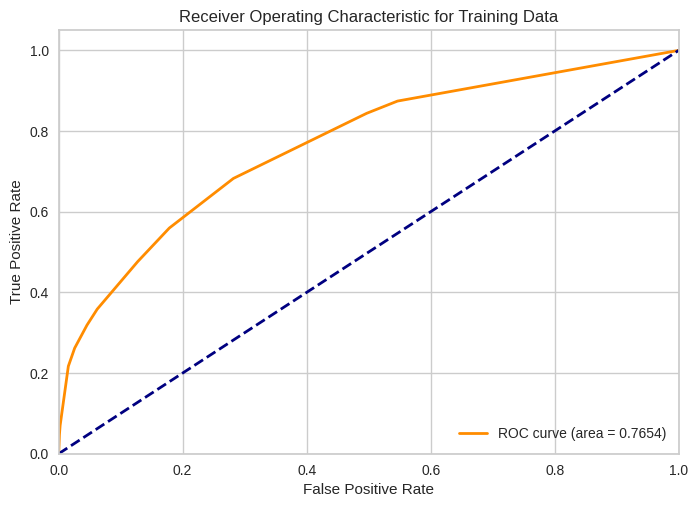

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train, y2_prob_train[:,1])
roc_auc = roc_auc_score(y2_train, y2_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

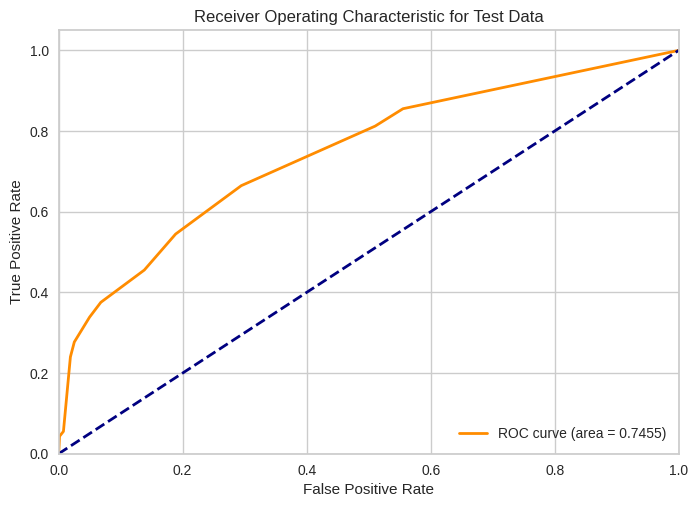

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test, y2_prob_test[:,1])
roc_auc = roc_auc_score(y2_test, y2_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

     importance                          feature
22     0.467839  host_response_time_not provided
20     0.227050                  host_since_2015
6      0.110394                number_of_reviews
108    0.060116       neighbourhood_not provided
1      0.046586                            price
29     0.027240         host_identity_verified_t
128    0.026832              property_type_House
10     0.017025            review_scores_checkin
2      0.016918                     cleaning_fee
101    0.000000      neighbourhood_West Congress


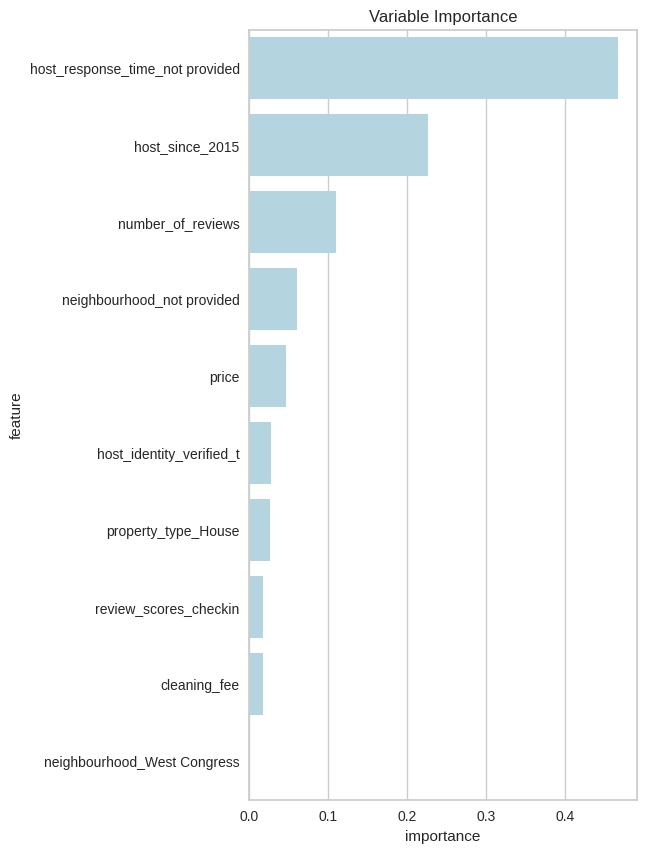

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X2.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False).head(10)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

### Train and Test an edited decision tree

In [ ]:
# split the data into training and testing sets
X3 = austin_bnb.drop(columns = ['booked', 'availability_30', 'availability_60', 'availability_90'], axis=1)
X3 = austin_bnb[['host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'bedrooms', 'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy']]
X3 = pd.get_dummies(X3, columns=['host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city',
              'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy'], drop_first=True)

y3 = austin_bnb['booked']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Columns: 148 entries, bedrooms to cancellation_policy_super_strict_30
dtypes: float64(9), int64(5), uint8(134)
memory usage: 1013.0 KB
<class 'pandas.core.series.Series'>
Int64Index: 4084 entries, 2313 to 860
Series name: booked
Non-Null Count  Dtype
--------------  -----
4084 non-null   bool 
dtypes: bool(1)
memory usage: 35.9 KB


In [ ]:
# create an instance of a decision tree classifier
dt2 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt2.fit(X3_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt2, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

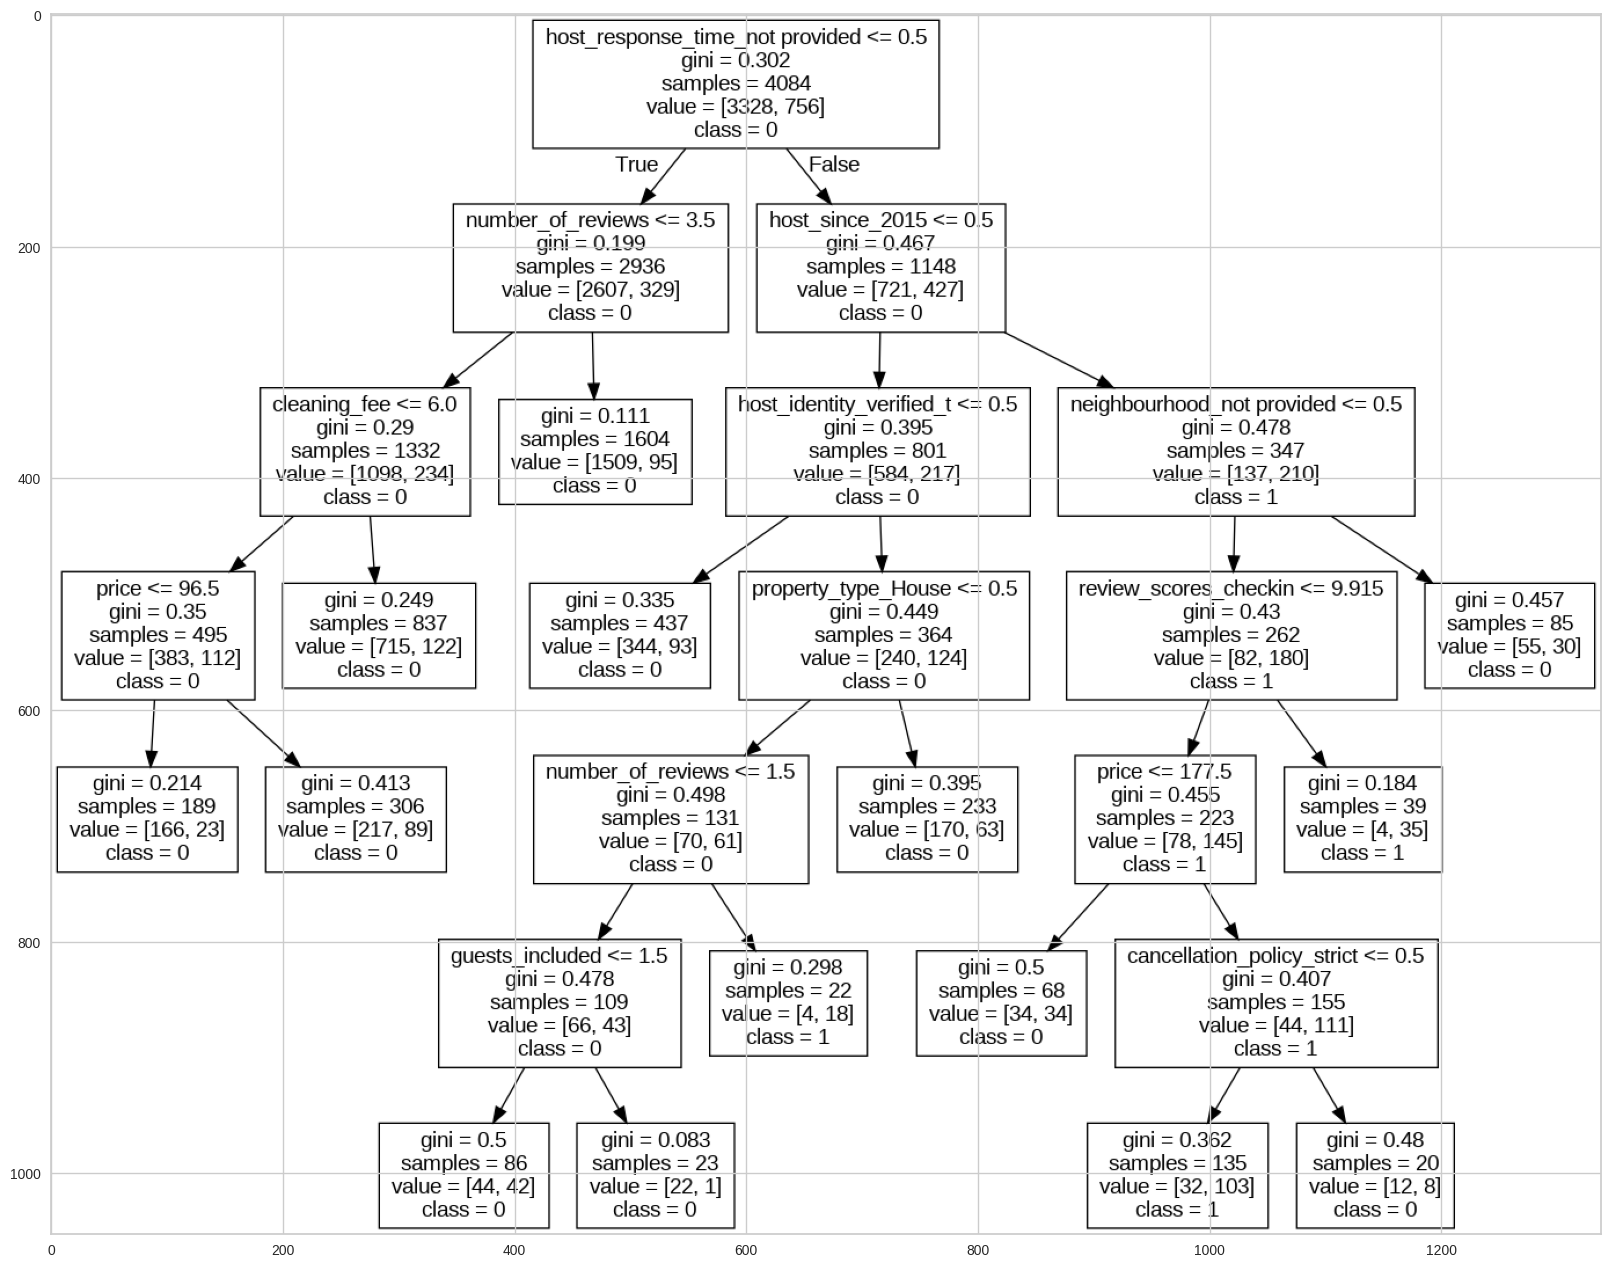

In [ ]:
export_graphviz(dt2,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X3_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y3_pred_train = dt2.predict(X3_train)
y3_pred_test = dt2.predict(X3_test)

y3_prob_train = dt2.predict_proba(X3_train)
y3_prob_test = dt2.predict_proba(X3_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y3_train, y3_pred_train)
prec_train = precision_score(y3_train, y3_pred_train)
rec_train = recall_score(y3_train, y3_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y3_test, y3_pred_test)
prec_test = precision_score(y3_test, y3_pred_test)
rec_test = recall_score(y3_test, y3_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8433
Precision: 0.7959
Recall.  : 0.2063

 -- test set -- 
Accuracy : 0.8418
Precision: 0.7667
Recall.  : 0.2123


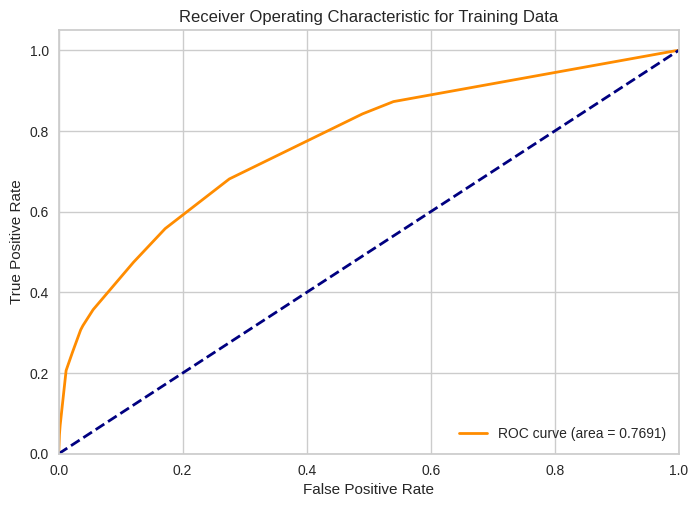

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y3_train, y3_prob_train[:,1])
roc_auc = roc_auc_score(y3_train, y3_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

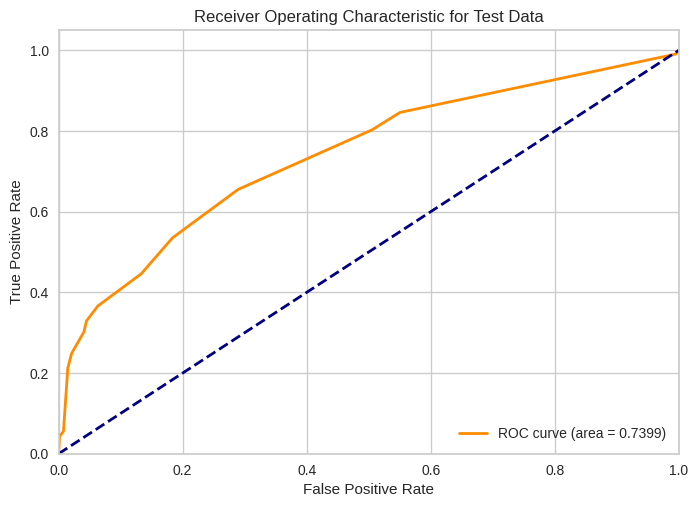

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y3_test, y3_prob_test[:,1])
roc_auc = roc_auc_score(y3_test, y3_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

     importance                          feature
22     0.445814  host_response_time_not provided
20     0.216361                  host_since_2015
6      0.105196                number_of_reviews
108    0.057286       neighbourhood_not provided
1      0.044393                            price
3      0.028725                  guests_included
29     0.025958         host_identity_verified_t
128    0.025569              property_type_House
146    0.018353       cancellation_policy_strict
10     0.016224            review_scores_checkin


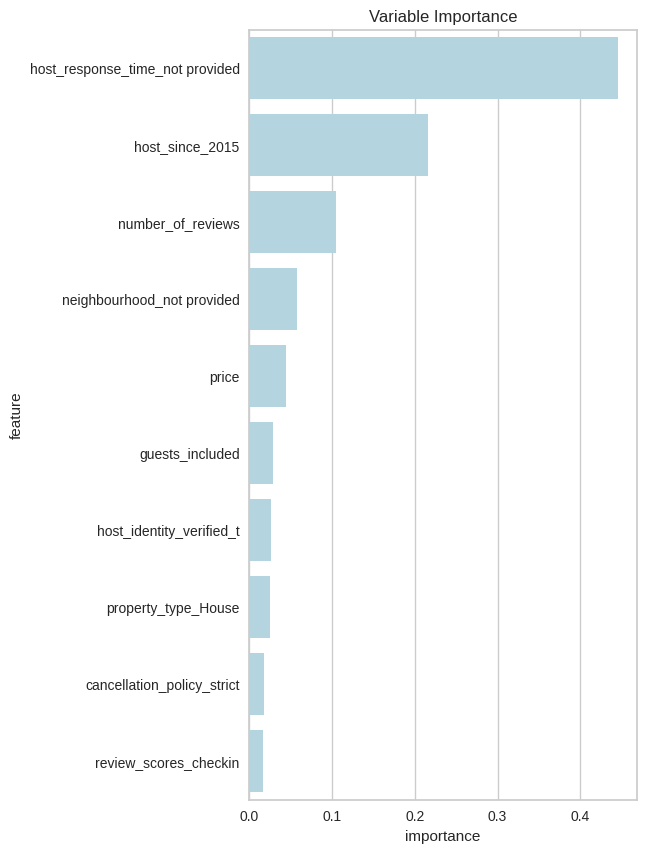

In [ ]:
#calculate feature importance
tree_imp = dt2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X3.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False).head(10)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

### Predict if the listing is booked or not

In [ ]:
# prediction of full dataframe
y_pred_full = dt2.predict(X3)
y_prob_full = dt2.predict_proba(X3)

In [ ]:
# for loop probability_fraud, probability_legit, prediction
booked_list = []
for row in y_prob_full:
    booked=row[1]
    booked_list.append(booked)

not_booked_list = []
for row in y_prob_full:
    not_booked=row[0]
    not_booked_list.append(not_booked)

In [ ]:
# appending all three columns to customer_prep
# appending fraud_list
pred_booked = pd.DataFrame(booked_list)
pred_booked.columns=[pred_booked]
austin_bnb['pred_booked'] = pred_booked

# appending legit_list
pred_not_booked = pd.DataFrame(not_booked_list)
pred_not_booked.columns=[pred_not_booked]
austin_bnb['pred_not_booked'] = pred_not_booked

# appending predictions
predictions = pd.DataFrame(y_pred_full)
predictions.columns=[predictions]
austin_bnb['predictions'] = predictions
austin_bnb

host_since  host_response_time host_is_superhost  host_listings_count  \
0          2011        not provided                 f                  1.0   
1          2015        not provided                 f                  1.0   
2          2015        not provided                 f                  2.0   
3          2015        not provided                 f                  2.0   
4          2015  within a few hours                 f                301.0   
...         ...                 ...               ...                  ...   
5830       2013  within a few hours                 t                 21.0   
5831       2015      within an hour                 f                  4.0   
5832       2014      within an hour                 f                  5.0   
5833       2015  a few days or more                 f                  2.0   
5834       2014        not provided                 f                  1.0   

     host_identity_verified neighbourhood             city property_type  \
0                         f      Circle C           Austin         House   
1                         t      Circle C           Austin     Camper/RV   
2                         t  not provided           Austin         House   
3                         t  not provided           Austin         House   
4                         t  not provided           Austin         House   
...                     ...           ...              ...           ...   
5830                      t      Downtown           Austin     Apartment   
5831                      t      Downtown           Austin   Condominium   
5832                      f  not provided  Cangas de OnÃ­s         House   
5833                      t  not provided       Round Rock     Apartment   
5834                      t  not provided     Pflugerville     Apartment   

            room_type  accommodates  ...  review_scores_checkin  \
0        Private room             6  ...              10.000000   
1        Private room             2  ...               9.830863   
2        Private room             2  ...               9.830863   
3        Private room             2  ...               9.830863   
4     Entire home/apt             6  ...               9.830863   
...               ...           ...  ...                    ...   
5830  Entire home/apt             4  ...              10.000000   
5831     Private room             2  ...               9.830863   
5832  Entire home/apt             2  ...              10.000000   
5833      Shared room             1  ...               9.830863   
5834  Entire home/apt             2  ...               9.830863   

      review_scores_communication  review_scores_location review_scores_value  \
0                       10.000000               10.000000           10.000000   
1                        9.839068                9.468378            9.416093   
2                        9.839068                9.468378            9.416093   
3                        9.839068                9.468378            9.416093   
4                        9.839068                9.468378            9.416093   
...                           ...                     ...                 ...   
5830                    10.000000               10.000000            9.000000   
5831                     9.839068                9.468378            9.416093   
5832                    10.000000               10.000000            8.000000   
5833                     9.839068                9.468378            9.416093   
5834                     9.839068                9.468378            9.416093   

      instant_bookable  cancellation_policy  booked  pred_booked  \
0                    f             moderate    True     0.212815   
1                    f             moderate   False     0.500000   
2                    f             flexible   False     0.352941   
3                    f             flexible   False     0.352941   
4                    f               

## Clustering

In [ ]:
# Drop Any Null Values & Convert Categorical Columns to Dummies
bnb_cluster = austin_bnb.drop(columns = ['availability_30', 'availability_60', 'pred_booked', 'pred_not_booked', 'predictions'], axis=1)
bnb_cluster = austin_bnb[['booked', 'host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'bedrooms', 'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy']]
bnb_cluster = pd.get_dummies(austin_bnb, columns=['host_since', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city',
              'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy'], drop_first=True)

bnb_cluster.info()
bnb_cluster.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Columns: 159 entries, host_listings_count to cancellation_policy_super_strict_30
dtypes: bool(2), float64(14), int64(9), uint8(134)
memory usage: 1.8 MB


host_listings_count  accommodates  bathrooms  bedrooms  beds  price  \
0                  1.0             6        2.5       1.0   3.0    300   
1                  1.0             2        0.0       1.0   1.0     99   
2                  2.0             2        1.5       1.0   1.0    100   
3                  2.0             2        1.5       1.0   1.0    100   
4                301.0             6        2.0       3.0   3.0    599   

   cleaning_fee  guests_included  extra_people  minimum_nights  ...  \
0           0.0                1             0               2  ...   
1          75.0                1             0               3  ...   
2           0.0                1             0               1  ...   
3           0.0                1             0               1  ...   
4         125.0                1             0               2  ...   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
1                      0               0               1   
2                      0               0               0   
3                      0               0               0   
4                      0               0               0   

   bed_type_Pull-out Sofa  bed_type_Real Bed  instant_bookable_t  \
0                       0                  1                   0   
1                       0                  0                   0   
2                       0                  1                   0   
3                       0                  1                   0   
4                       0                  1                   0   

   cancellation_policy_moderate  cancellation_policy_no_refunds  \
0                             1                               0   
1                             1                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   cancellation_policy_strict  cancellation_policy_super_strict_30  
0                           0                                    0  
1                           0                                    0  
2                           0                                    0  
3                           0                                    0  
4                           1                                    0  

[5 rows x 159 columns]

In [ ]:
#Standardize Data
bnbcolumns = bnb_cluster.columns.values.tolist()

scaler = StandardScaler()

bnb_scaled = scaler.fit_transform(bnb_cluster.to_numpy())
bnb_scaled = pd.DataFrame(bnb_scaled, columns=bnbcolumns)


bnb_scaled.head()

host_listings_count  accommodates  bathrooms  bedrooms      beds     price  \
0            -0.195471      0.599453   1.322591 -0.650238  0.478072  0.034271   
1            -0.195471     -0.888185  -1.917835 -0.650238 -0.735800 -0.464245   
2            -0.177317     -0.888185   0.026420 -0.650238 -0.735800 -0.461764   
3            -0.177317     -0.888185   0.026420 -0.650238 -0.735800 -0.461764   
4             5.250922      0.599453   0.674506  1.110206  0.478072  0.775843   

   cleaning_fee  guests_included  extra_people  minimum_nights  ...  \
0     -0.798326        -0.496572     -0.458426       -0.018229  ...   
1      0.464647        -0.496572     -0.458426        0.160838  ...   
2     -0.798326        -0.496572     -0.458426       -0.197296  ...   
3     -0.798326        -0.496572     -0.458426       -0.197296  ...   
4      1.306629        -0.496572     -0.458426       -0.018229  ...   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0              -0.146743       -0.064266       -0.113336   
1              -0.146743       -0.064266        8.823341   
2              -0.146743       -0.064266       -0.113336   
3              -0.146743       -0.064266       -0.113336   
4              -0.146743       -0.064266       -0.113336   

   bed_type_Pull-out Sofa  bed_type_Real Bed  instant_bookable_t  \
0               -0.061519           0.189368           -0.313778   
1               -0.061519          -5.280733           -0.313778   
2               -0.061519           0.189368           -0.313778   
3               -0.061519           0.189368           -0.313778   
4               -0.061519           0.189368           -0.313778   

   cancellation_policy_moderate  cancellation_policy_no_refunds  \
0                      1.849447                       -0.013092   
1                      1.849447                       -0.013092   
2                     -0.540702                       -0.013092   
3                     -0.540702                       -0.013092   
4                     -0.540702                       -0.013092   

   cancellation_policy_strict  cancellation_policy_super_strict_30  
0                   -0.819415                            -0.039304  
1                   -0.819415                            -0.039304  
2                   -0.819415                            -0.039304  
3                   -0.819415                            -0.039304  
4                    1.220383                            -0.039304  

[5 rows x 159 columns]

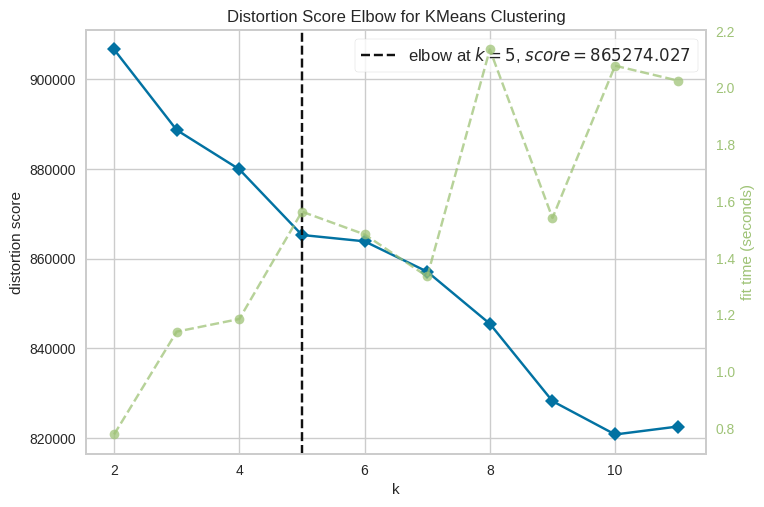

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(bnb_scaled)
visualizer.show()

In [ ]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=5, random_state=904)
kmclus=kmeans.fit(bnb_scaled)

clusters = kmeans.fit_predict(bnb_scaled)

#append cluster to original data
bnb_cluster['cluster']=clusters

bnb_cluster.info()

# Evaluate cluster sizes to insure that they are similar
print(bnb_cluster['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = bnb_cluster.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Columns: 160 entries, host_listings_count to cluster
dtypes: bool(2), float64(14), int32(1), int64(9), uint8(134)
memory usage: 1.8 MB
3    3946
1    1498
0     291
4      85
2      15
Name: cluster, dtype: int64
         host_listings_count  accommodates  bathrooms  bedrooms   beds  \
cluster                                                                  
0                     41.694         4.254      1.338     1.574  2.035   
1                     30.194         7.557      2.314     3.159  4.059   
2                     11.767         3.733      1.399     1.733  2.200   
3                      2.698         3.210      1.177     1.221  1.531   
4                      5.576         3.812      1.300     1.306  1.918   

           price  cleaning_fee  guests_included  extra_people  minimum_nights  \
cluster                                                                         
0        191.701        43.021  

Austin Airbnb


<Figure size 800x400 with 0 Axes>

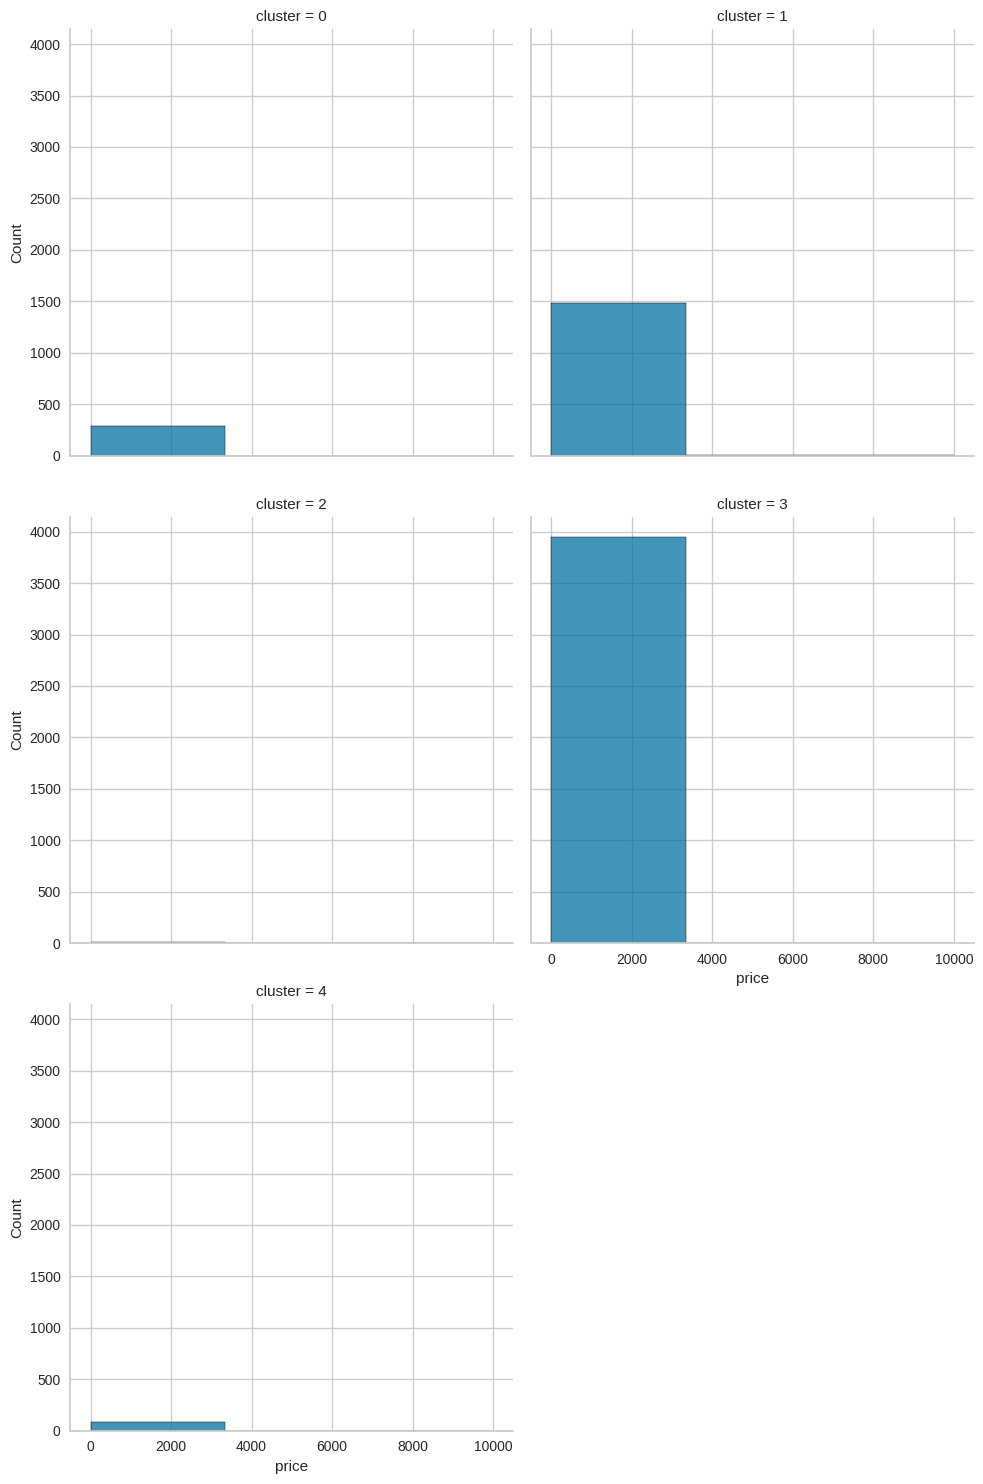

In [ ]:
# Cluster for Price
plt.figure(figsize=(8,4))
print("Austin Airbnb")
sns.displot(data=bnb_cluster, x="price", bins=3, col='cluster', col_wrap=2, common_bins=True)
plt.show()

Austin Airbnb


<Figure size 800x400 with 0 Axes>

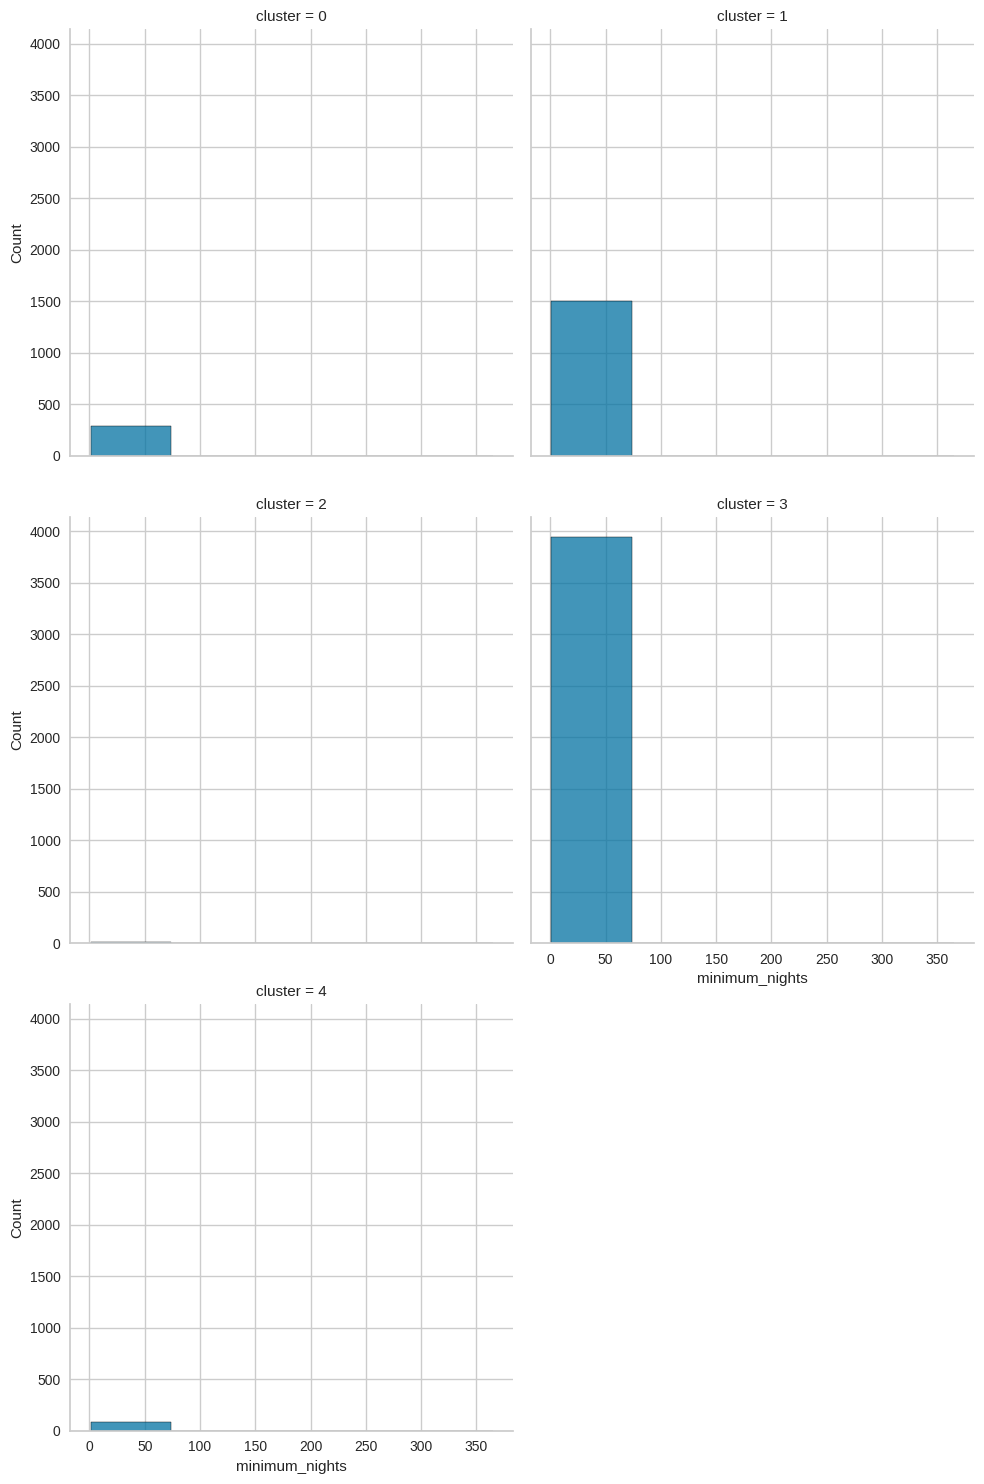

In [ ]:
# Minimum_nights Cluster
plt.figure(figsize=(8,4))
print("Austin Airbnb")
sns.displot(data=bnb_cluster, x="minimum_nights", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

Austin Airbnb


<Figure size 800x400 with 0 Axes>

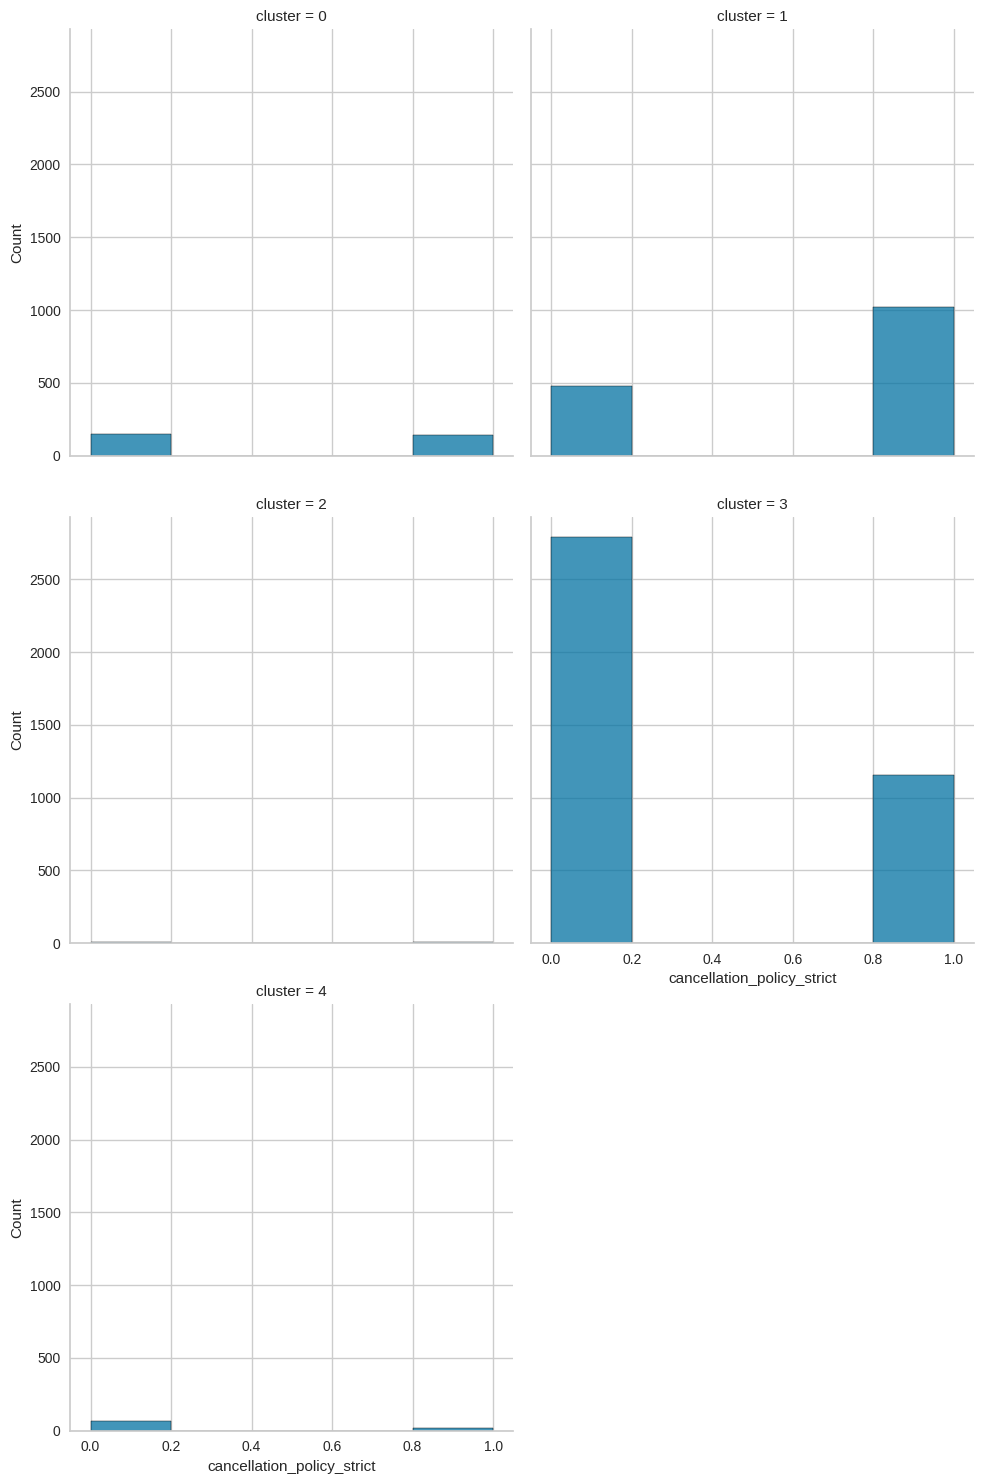

In [ ]:
# Minimum_nights Cluster
plt.figure(figsize=(8,4))
print("Austin Airbnb")
sns.displot(data=bnb_cluster, x="cancellation_policy_strict", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

Austin Airbnb


<Figure size 800x400 with 0 Axes>

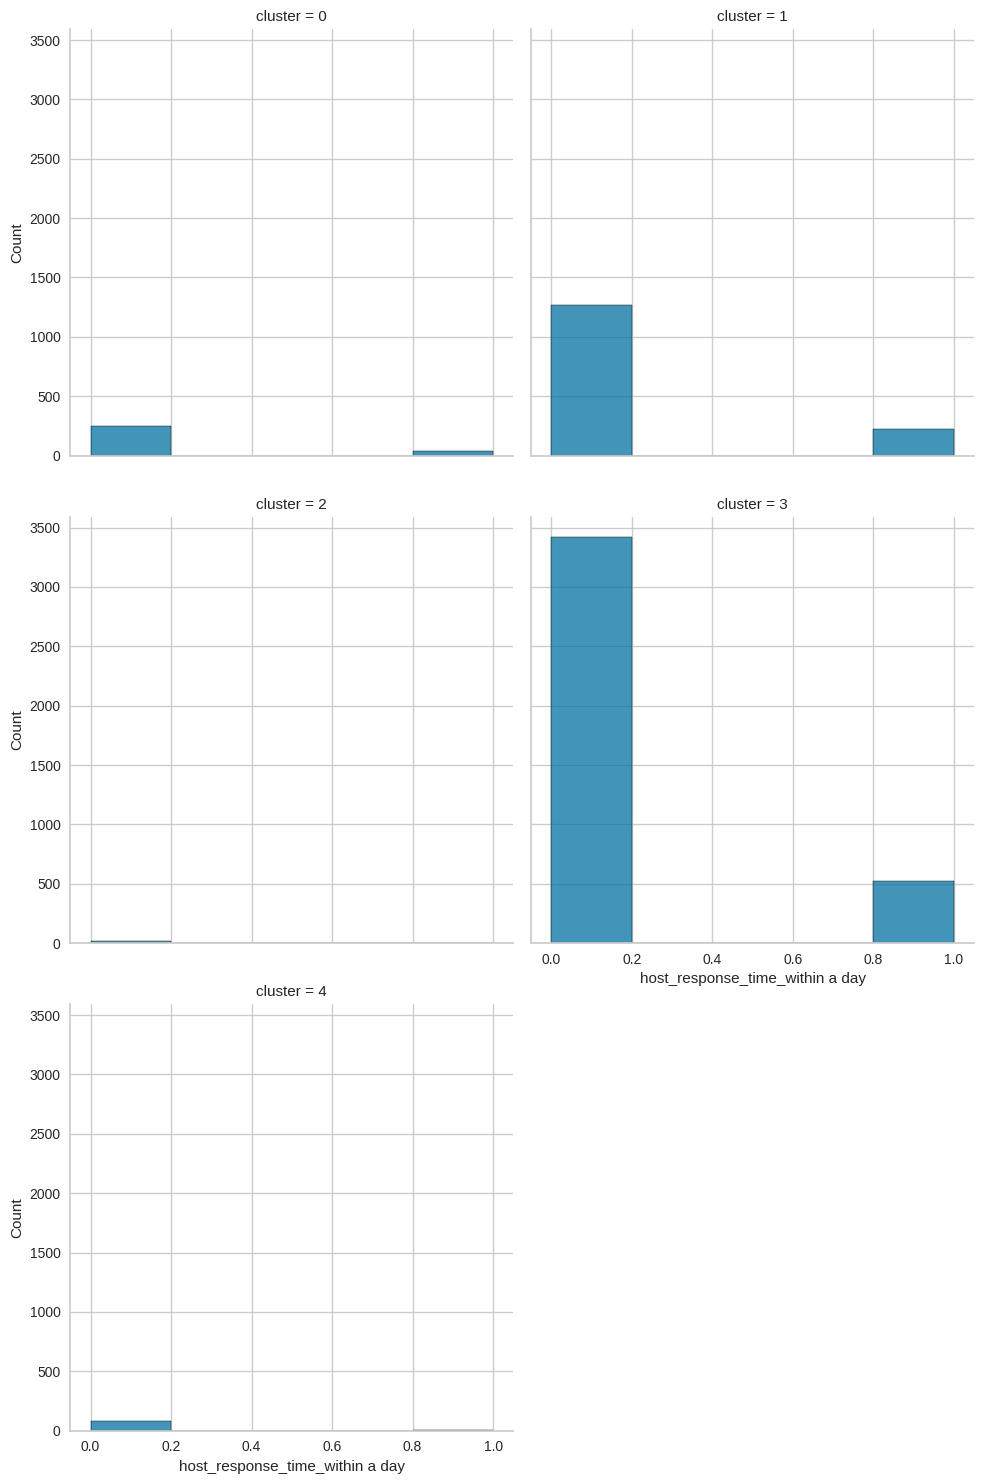

In [ ]:
# Minimum_nights Cluster
plt.figure(figsize=(8,4))
print("Austin Airbnb")
sns.displot(data=bnb_cluster, x="host_response_time_within a day", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

### Convert to an html

In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project: Investing in Austin - LJohnson"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project: Investing in Austin - LJohnson to html
[NbConvertApp] Writing 5891669 bytes to /content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project: Investing in Austin - LJohnso.html
